In [2]:
%reload_ext autoreload
%autoreload 2

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from ripple_heterogeneity.utils import functions,loading
import seaborn as sns
from tqdm import tqdm
from matplotlib.ticker import AutoMinorLocator

C:\Users\Cornell\anaconda3\envs\ripple_diversity\lib\site-packages\nelpy\plotting\decoding.py:9: MatplotlibDeprecationWarning: 
The mpl_toolkits.axes_grid module was deprecated in Matplotlib 2.1 and will be removed two minor releases later. Use mpl_toolkits.axes_grid1 and mpl_toolkits.axisartist, which provide the same functionality instead.


In [4]:
df_sessions = pd.read_csv(r'Z:\home\ryanh\projects\ripple_heterogeneity\sessions.csv')
# remove sessions with potential opto manipulation
idx = df_sessions.basepath.str.contains("OMLproject") | df_sessions.basepath.str.contains("OR")
df_sessions = df_sessions[~idx]


# load all cell metrics from all sessions

In [5]:
df = loading.load_all_cell_metrics(df_sessions.basepath.unique())
df = df[(df.bad_unit == False) & (df.spikeCount > 200) & (df.tags_bad_waveform != True)]
df["unit_id"] = np.arange(0,len(df))
df    

CA1depth  DS1_modulationIndex  DS1_modulationPeakResponseTime  \
0           3.0                  inf                           0.001   
1          -4.0                  inf                           0.033   
2         -11.0             1.833333                           0.004   
3          -8.0             3.000000                           0.001   
4         -19.0                  inf                           0.008   
...         ...                  ...                             ...   
21876       NaN                  NaN                             NaN   
21877       NaN                  NaN                             NaN   
21878       NaN                  NaN                             NaN   
21879       NaN                  NaN                             NaN   
21880       NaN                  NaN                             NaN   

       DS1_modulationSignificanceLevel  DS2_modulationIndex  \
0                             0.999845             0.842105   
1                             1.000000             0.562500   
2                             0.999845             1.134921   
3                             1.000000             3.468750   
4                             1.000000             2.333333   
...                                ...                  ...   
21876                              NaN                  NaN   
21877                              NaN                  NaN   
21878                              NaN                  NaN   
21879                              NaN                  NaN   
21880                              NaN                  NaN   

       DS2_modulationPeakResponseTime  DS2_modulationSignificanceLevel  UID  \
0                               0.072                         0.994008    1   
1                              -0.018                         0.999845    2   
2                               0.005                         0.608185    3   
3                               0.010                         0.000526    4   
4                               0.025                         0.177991    5   
...                               ...                              ...  ...   
21876                             NaN                              NaN  352   
21877                             NaN                              NaN  353   
21878                             NaN                              NaN  354   
21879                             NaN                              NaN  355   
21880                             NaN                              NaN  356   

       ab_ratio  acg_asymptote  ...  placeFieldsCount  spatialCoherence  \
0      0.189795      -1.536886  ...               NaN               NaN   
1     -0.473978     -27.743195  ...               NaN               NaN   
2      0.276535       0.840785  ...               NaN               NaN   
3      0.494590     -12.465753  ...               NaN               NaN   
4     -0.026260       0.743235  ...               NaN               NaN   
...         ...            ...  ...               ...               ...   
21876 -0.165195       4.068316  ...               NaN               NaN   
21877  0.028749       3.551462  ...               NaN               NaN   
21878 -0.073428       8.220768  ...               NaN               NaN   
21879 -0.230189       1.495407  ...               NaN               NaN   
21880  0.337794       3.583255  ...               NaN               NaN   

       spatialCoverageIndex  spatialGiniCoeff  spatialPeakRate  \
0                       NaN               NaN              NaN   
1                       NaN               NaN              NaN   
2                       NaN               NaN              NaN   
3                       NaN               NaN              NaN   
4                       NaN               NaN              NaN   
...                     ...               ...              ...   
21876                   NaN               NaN              NaN   
21877  

In [5]:
# find session with the most deep and superficial ca1 pyr units
n_deep = []
n_superficial = []
for basepath in df.basepath.unique():
    n_deep.append(
        np.sum(
            (df.basepath == basepath)
            & (df.putativeCellType == "Pyramidal Cell")
            & (df.deepSuperficial == "Deep")
            & (df.brainRegion.str.contains("CA1"))
        )
    )
    n_superficial.append(
        np.sum(
            (df.basepath == basepath)
            & (df.putativeCellType == "Pyramidal Cell")
            & (df.deepSuperficial == "Superficial")
            & (df.brainRegion.str.contains("CA1"))
        )
    )

array(['Z:\\Data\\AYAold\\AB1\\day1', 'Z:\\Data\\AYAold\\AB3\\AB3_38_41',
       'Z:\\Data\\AYAold\\AB3\\AB3_47_49',
       'Z:\\Data\\AYAold\\AB3\\AB3_50_51',
       'Z:\\Data\\AYAold\\AB3\\AB3_55_57',
       'Z:\\Data\\AYAold\\AB3\\AB3_58_59',
       'Z:\\Data\\AYAold\\AB3\\AB3_60', 'Z:\\Data\\AYAold\\AYA6\\day19',
       'Z:\\Data\\AYAold\\AYA6\\day20', 'Z:\\Data\\AYAold\\AYA9\\day15',
       'Z:\\Data\\AYAold\\AYA9\\day20',
       'Z:\\Data\\GirardeauG\\Rat08\\Rat08-20130713',
       'Z:\\Data\\GrosmarkAD\\Achilles\\Achilles_10252013',
       'Z:\\Data\\GrosmarkAD\\Achilles\\Achilles_11012013',
       'Z:\\Data\\GrosmarkAD\\Cicero\\Cicero_09012014',
       'Z:\\Data\\GrosmarkAD\\Cicero\\Cicero_09102014',
       'Z:\\Data\\GrosmarkAD\\Cicero\\Cicero_09172014',
       'Z:\\Data\\Kenji\\ec014.271_287', 'Z:\\Data\\Kenji\\ec016.577_590',
       'Z:\\Data\\Kenji\\i01_maze05_MS.001_003', 'Z:\\Data\\HMC1\\day8'],
      dtype=object)

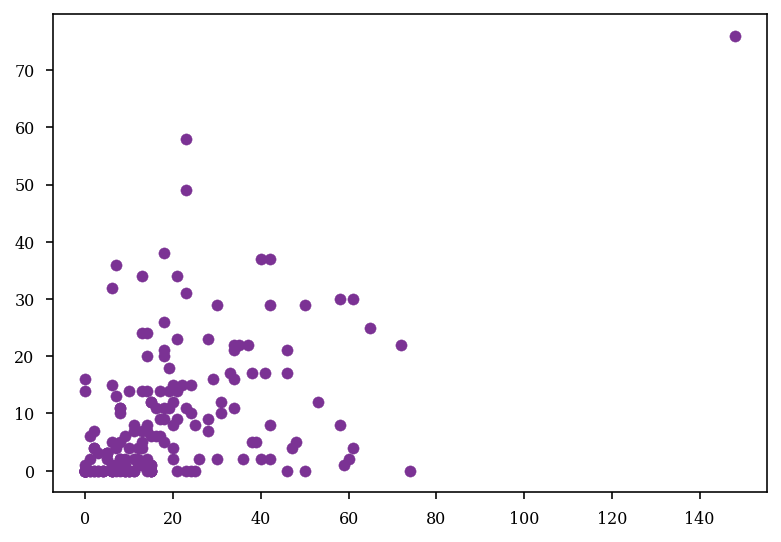

In [41]:
plt.scatter(n_deep,n_superficial)
df.basepath.unique()[(np.array(n_deep)>20) & (np.array(n_superficial)>20)]

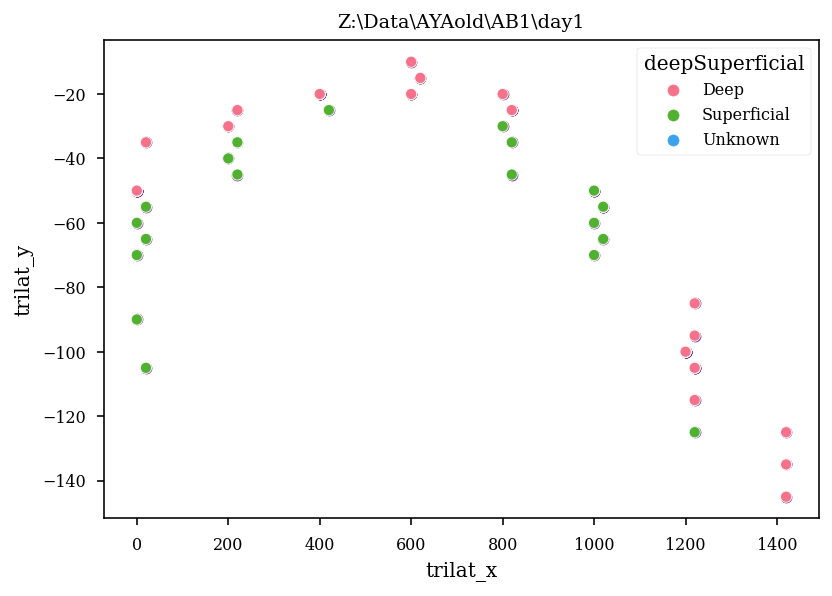

In [43]:
idx = df.basepath == "Z:\\Data\\AYAold\\AB1\\day1"
for basepath in df[idx].basepath.unique():
    idx_ = df.basepath == basepath
    plt.scatter(df[idx_ & (df.brainRegion.str.contains("CA1"))].trilat_x,df[idx_ & (df.brainRegion.str.contains("CA1"))].trilat_y)
    sns.scatterplot(x="trilat_x", y="trilat_y",
                hue="deepSuperficial",
                hue_order=['Deep','Superficial','Unknown'],
                data=df[idx_ & (df.brainRegion.str.contains("CA1"))])    
    plt.title(basepath)
    plt.show()
# df.deepSuperficial
# sns.scatterplot(x="trilat_x", y="trilat_y",
#                 hue="deepSuperficial",
#                 data=df[df.animal == 'AB3'])    

In [290]:
# remove columns that are >50% nan
# nan_count = df.isna().sum()
# idx = nan_count.values > df.shape[0]*.5 
# df = df.drop(columns=df.keys()[idx])
# df

In [5]:
df.brainRegion.unique()

array(['CA1so', 'CA1sr', 'CA3', 'CA1sp', 'Unknown', 'DG', 'CA1', 'CA1slm',
       'CA2', 'CTX', 'LEC', 'MEC', 'LM', 'blv', 'ven', 'ladl', 'den',
       'pir', 'plc01', 'bmp', 'cpu', 'EC3', 'EC5', 'EC4', 'EC2', 'DGCA3',
       'EC1', 'CA', 'PFC', 'V1'], dtype=object)

# add rem shifting info

In [ ]:
df.loc[:,'rem_shift'] = False
df.loc[:,'non_rem_shift'] = False
df.loc[:,'m_wake'] = np.nan
df.loc[:,'m_rem'] = np.nan
df.loc[:,'p_rem'] = np.nan
df.loc[:,'p_wake'] = np.nan
df.loc[:,'circ_dist'] = np.nan

for basepath in tqdm(df.basepath.unique()):
    df_rem_shift, _ = loading.load_theta_rem_shift(basepath)
    if df_rem_shift.shape[0] == 0:
        continue

    # restrict rem shift df to valid UIDs from df
    df_rem_shift = df_rem_shift[np.in1d(df_rem_shift.UID,df[df.basepath == basepath].UID)]
    # get index of current basepath
    # idx = (df.basepath==basepath).values
    idx = df.basepath==basepath
    
    df.loc[idx,"rem_shift"] = (df_rem_shift.rem_shift==1).values
    df.loc[idx,"non_rem_shift"] = (df_rem_shift.non_rem_shift==1).values

    df.loc[idx,"m_rem"] = df_rem_shift.m_rem.values
    df.loc[idx,"m_wake"] = df_rem_shift.m_wake.values
    df.loc[idx,"p_rem"] = df_rem_shift.p_rem.values
    df.loc[idx,"p_wake"] = df_rem_shift.p_wake.values
    df.loc[idx,"circ_dist"] = df_rem_shift.circ_dist.values
    
df.loc[df.rem_shift == True,"rem_shift"] = "rem_shifting"
df.loc[df.rem_shift == False,"rem_shift"] = "unknown"

df.loc[df.non_rem_shift == True,"non_rem_shift"] = "non_rem_shifting"
df.loc[df.non_rem_shift == False,"non_rem_shift"] = "unknown"    

# make deep-REM shifting vs sup-non shifting

In [12]:
layer_rem_shift = []
for temp_df in df.itertuples():
    if (temp_df.rem_shift == "rem_shifting") & (temp_df.deepSuperficial == "Deep"):
        layer_rem_shift.append("deep_rem_shift")
    elif (temp_df.non_rem_shift == "non_rem_shifting") & (temp_df.deepSuperficial == "Superficial"):
        layer_rem_shift.append("sup_non_rem_shift")
    else:
        layer_rem_shift.append("unknown")
df['layer_rem_shift'] = layer_rem_shift

C:\Users\Cornell\AppData\Local\Temp\ipykernel_4720\2587079010.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


# Add ca1 sublayer (deep,mid,sup)

In [13]:
deep = -30
middle = [-30,30]
sup = 30

df.loc[df.deepSuperficialDistance  < deep, "ca1_layer"] = "Deep"
df.loc[(df.deepSuperficialDistance  > middle[0]) & (df.deepSuperficialDistance  < middle[1]), "ca1_layer"] = "Middle"
df.loc[df.deepSuperficialDistance  > sup, "ca1_layer"] = "Superficial"

In [295]:
# idx = (df.rem_shift=="rem_shifting") & (df.deepSuperficial=="Deep")
# df.loc[idx,"layer_rem_shift_"] = "deep_rem_shift"

# idx = (df.non_rem_shift=="non_rem_shifting") & (df.deepSuperficial=="Superficial")
# df.loc[idx,"layer_rem_shift_"] = "sup_non_rem_shift"

# idx = ((df.non_rem_shift=="non_rem_shifting") & (df.deepSuperficial=="Superficial")) | ((df.non_rem_shift=="non_rem_shifting") & (df.deepSuperficial=="Superficial"))
# df.loc[~idx,"layer_rem_shift_"] = "unknown"

# df.layer_rem_shift = df.layer_rem_shift_

In [7]:
print(len(df.animal.unique()), " animals")
# print(df[df.epoch=='task'].animal.value_counts())
print(df.animal.unique())

print("")
df["animal_session"] = df.animal + df.basename
print(len(df.animal_session.unique()), " individual sessions")
# print(df.animal_session.unique())

# print('')
# print(sum(df.epoch == "task"),' units during some type of task')

print("")
print(df[df.brainRegion.str.contains("CA1") == True].putativeCellType.value_counts())

# print('')
# print(df[df.epoch=='task'].task.value_counts())

# print('')
# print(df.brainRegion.value_counts())

print("")
print(
    df[
        (df.brainRegion.str.contains("CA1"))
        & (df.putativeCellType.str.contains("Pyramidal Cell"))
    ].deepSuperficial.value_counts()
)

print("")
print(
    df[
        (df.brainRegion.str.contains("CA1"))
        & (df.putativeCellType.str.contains("Pyramidal Cell"))
    ].ca1_layer.value_counts()
)
# print('')
# print(df.epoch.value_counts())


32  animals
['AB1' 'AB3' 'AB4' 'AYA10' 'AYA4' 'AYA6' 'AYA7' 'AYA9' 'Rat08' 'Rat09'
 'Rat10' 'Rat11' 'Achilles' 'Buddy' 'Cicero' 'Gatsby' '2006-4-10'
 '2006-4-18' '2006-6-12' '2006-6-13' '2006-6-7' 'ec013' 'ec014' 'Kenji'
 'ec016' 'f01_m' 'g01_m' 'i01_m' 'j01_m' 'km01' 'nlx' 'HMC1']

212  individual sessions

Pyramidal Cell        5092
Narrow Interneuron     887
Wide Interneuron       107
Name: putativeCellType, dtype: int64

Deep           3441
Superficial    1651
Name: deepSuperficial, dtype: int64

Deep           1962
Middle         1855
Superficial    1267
Name: ca1_layer, dtype: int64


In [8]:
functions.set_plotting_defaults()
%config InlineBackend.figure_format = 'retina'

fig_save_path = r'Z:\home\ryanh\projects\ripple_heterogeneity\figures\panels'

# only look at CA1 for now

In [9]:
df = df[df.brainRegion.str.contains("CA1") == True]
df.brainRegion.unique()


array(['CA1so', 'CA1sr', 'CA1sp', 'CA1', 'CA1slm'], dtype=object)

In [14]:
# df.layer_rem_shift
print(df.layer_rem_shift.value_counts())


unknown              4175
deep_rem_shift       1181
sup_non_rem_shift     730
Name: layer_rem_shift, dtype: int64


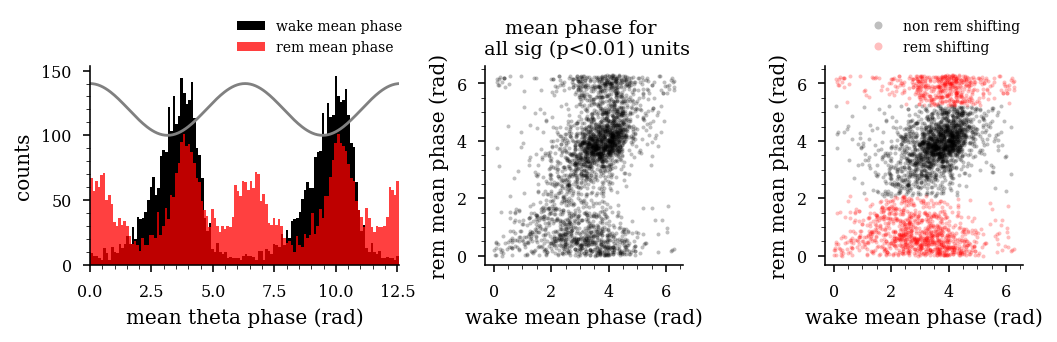

In [300]:
fig, axs = plt.subplots(1,3, figsize=functions.set_size('thesis', fraction=1.5, subplots=(1, 3)), edgecolor='k')
fig.subplots_adjust(hspace = 0, wspace=.1)
axs = axs.ravel()

idx = (df.p_rem < 0.01) & (df.p_wake< 0.01) & (df.putativeCellType == "Pyramidal Cell")
axs[1].plot(df.m_wake[idx],df.m_rem[idx],'.k',alpha=.25,markersize=4)
axs[1].set_aspect('equal', adjustable='box')
axs[1].set_xlabel('wake mean phase (rad)')
axs[1].set_ylabel('rem mean phase (rad)')
axs[1].set_title('mean phase for \n all sig (p<0.01) units')

idx = (df.non_rem_shift=="non_rem_shifting") & (df.putativeCellType == "Pyramidal Cell")
axs[2].plot(df.m_wake[idx],df.m_rem[idx],'.k',alpha=.25,markersize=4,label="non rem shifting")
idx = (df.rem_shift=="rem_shifting") & (df.putativeCellType == "Pyramidal Cell")
axs[2].plot(df.m_wake[idx],df.m_rem[idx],'.r',alpha=.25,markersize=4,label="rem shifting")
axs[2].set_aspect('equal', adjustable='box')
axs[2].set_xlabel('wake mean phase (rad)')
axs[2].set_ylabel('rem mean phase (rad)')
axs[2].legend(loc='best', bbox_to_anchor=(.55, 0., 0.5, 1.3),fontsize='x-small',frameon=False,markerscale=2)

idx = (df.p_rem < 0.01) & (df.p_wake< 0.01) & (df.putativeCellType == "Pyramidal Cell")
axs[0].hist(np.hstack((df.m_wake[idx],df.m_wake[idx]+2*np.pi)),120,color="k",label="wake mean phase")
axs[0].hist(np.hstack((df.m_rem[idx],df.m_rem[idx]+2*np.pi)),120,alpha=.75,color="r",label="rem mean phase")
axs[0].set_xlabel('mean theta phase (rad)')
axs[0].set_ylabel('counts')
axs[0].set_xlim(0,4*np.pi)
axs[0].legend(loc='best', bbox_to_anchor=(.55, 0., 0.5, 1.3),fontsize='x-small',frameon=False)

t = np.linspace(0,4*np.pi,240)

axs[0].plot(t,np.sin(np.arange(0,4*np.pi,np.pi/60)+np.pi/2)*20+120,color='grey')

for i in range(3):
    axs[i].spines["right"].set_visible(False)
    axs[i].spines["top"].set_visible(False)
    axs[i].xaxis.set_minor_locator(AutoMinorLocator())
    axs[i].yaxis.set_minor_locator(AutoMinorLocator())

plt.savefig(os.path.join(fig_save_path,'rem_shifting.svg'),dpi=300,bbox_inches='tight')


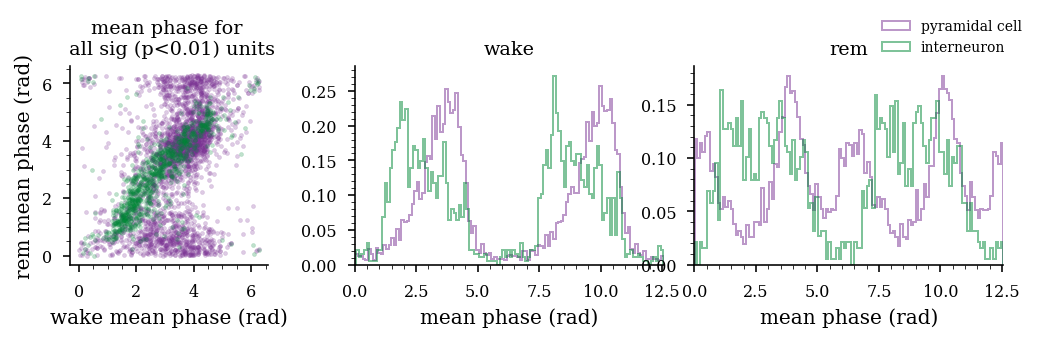

In [301]:
fig, axs = plt.subplots(1,3, figsize=functions.set_size('thesis', fraction=1.5, subplots=(1, 3)), edgecolor='k')
fig.subplots_adjust(hspace = 0, wspace=.1)
axs = axs.ravel()

idx = (df.p_rem < 0.01) & (df.p_wake< 0.01) & (df.putativeCellType == "Pyramidal Cell")
axs[0].scatter(df.m_wake[idx],df.m_rem[idx],alpha=.25,s=4)
idx = (df.p_rem < 0.01) & (df.p_wake< 0.01) & ((df.putativeCellType == "Narrow Interneuron") | (df.putativeCellType == "Wide Interneuron"))
axs[0].scatter(df.m_wake[idx],df.m_rem[idx],alpha=.25,s=4)

axs[0].set_aspect('equal', adjustable='box')
axs[0].set_xlabel('wake mean phase (rad)')
axs[0].set_ylabel('rem mean phase (rad)')
axs[0].set_title('mean phase for \n all sig (p<0.01) units')


idx = (df.p_rem < 0.01) & (df.p_wake< 0.01) & (df.putativeCellType == "Pyramidal Cell")
x = np.hstack((df.m_wake[idx],df.m_wake[idx]+2*np.pi))
axs[1].hist(x,120,density=True,alpha=.5,histtype="step",linewidth=1)

idx = (df.p_rem < 0.01) & (df.p_wake< 0.01) & ((df.putativeCellType == "Narrow Interneuron") | (df.putativeCellType == "Wide Interneuron"))
x = np.hstack((df.m_wake[idx],df.m_wake[idx]+2*np.pi))
axs[1].hist(x,120,density=True,alpha=.5,histtype="step",linewidth=1)


idx = (df.p_rem < 0.01) & (df.p_wake< 0.01) & (df.putativeCellType == "Pyramidal Cell")
x = np.hstack((df.m_rem[idx],df.m_rem[idx]+2*np.pi))
axs[2].hist(x,120,density=True,alpha=.5,histtype="step",linewidth=1,label="pyramidal cell")

idx = (df.p_rem < 0.01) & (df.p_wake< 0.01) & ((df.putativeCellType == "Narrow Interneuron") | (df.putativeCellType == "Wide Interneuron"))
x = np.hstack((df.m_rem[idx],df.m_rem[idx]+2*np.pi))
axs[2].hist(x,120,density=True,alpha=.5,histtype="step",linewidth=1,label="interneuron")

axs[1].set_title("wake")
axs[2].set_title("rem")

axs[1].set_xlabel('mean phase (rad)')
axs[2].set_xlabel('mean phase (rad)')

axs[1].set_xlim(0,4*np.pi)
axs[2].set_xlim(0,4*np.pi)

# axs[1].axes.get_yaxis().set_ticks([])
# axs[2].axes.get_yaxis().set_ticks([])

axs[2].legend(loc='best', bbox_to_anchor=(.6, 0., 0.5, 1.3),fontsize='x-small',frameon=False)

for i in range(3):
    axs[i].spines["right"].set_visible(False)
    axs[i].spines["top"].set_visible(False)
    axs[i].xaxis.set_minor_locator(AutoMinorLocator())
    axs[i].yaxis.set_minor_locator(AutoMinorLocator())

plt.savefig(os.path.join(fig_save_path,'rem_shifting_pyr_int.pdf'),dpi=300,bbox_inches='tight')

rem_shift        rem_shifting  unknown
deepSuperficial                       
Deep                     1396     3899
Superficial               355     2436

C:\Users\Cornell\AppData\Local\Temp/ipykernel_25004/721306672.py:4: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.


\begin{tabular}{lrr}
\toprule
rem\_shift &  rem\_shifting &  unknown \\
deepSuperficial &               &          \\
\midrule
Deep            &          1396 &     3899 \\
Superficial     &           355 &     2436 \\
\bottomrule
\end{tabular}



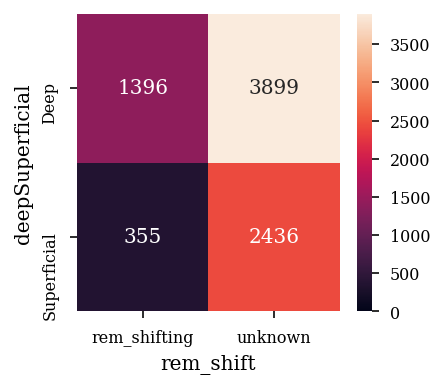

In [302]:
df_con = pd.crosstab(index=df['deepSuperficial'], columns=df['rem_shift'])
display(df_con)

print(df_con.to_latex(index=True)) 

plt.figure(figsize=functions.set_size('thesis', fraction=.5, subplots=(1.5, 1)))
res = sns.heatmap(df_con, annot=True, vmin=0.0, fmt='.0f')

In [303]:
# print(df[(df.rem_shift=="rem_shifting") & (df.putativeCellType=="Pyramidal Cell")].animal.value_counts().to_latex(index=True))

# bar_df = df[(df.rem_shift=="rem_shifting") & (df.putativeCellType=="Pyramidal Cell")].animal.value_counts()
# sns.barplot(data = bar_df)
# bar_df

# wide to long format for states

In [15]:
temp_df = pd.DataFrame()
df_states = pd.DataFrame()

# states to look at
# states = ["_NREMepisode", "_WAKEepisode"]
states = ["_WAKEepisode","_WAKEstate","_NREMepisode","_NREMpacket","_NREMstate"]
# grouping vars
id_vars = [
    "unit_id",
    "basepath",
    "basename",
    "animal",
    "putativeCellType",
    "brainRegion",
    "deepSuperficial",
    "deepSuperficialDistance",
    "ca1_layer",
    "rem_shift",
    "non_rem_shift",
    "layer_rem_shift",
    "spikeCount",
    "tags_bad_waveform"
]
# locate column names
fields = df.keys()
# iter through each state
for s in states:
    # locate the columns with that state indicator
    idx = fields.str.contains(s)
    # seperate the var name from state indicator
    field_names = [st.split(s)[0] for st in fields[idx]]
    # create temp df with vars of interest
    temp_df = pd.DataFrame(
        df[id_vars + list(fields[idx].values)].values, columns=id_vars + field_names
    )
    # add the state indicator
    temp_df["state"] = s
    # append the temp dfs together into long format :)
    df_states = pd.concat([df_states,temp_df])
    # df_states = df_states.append(temp_df)

for key in df_states.keys():
    df_states[key] = [item for item in df_states[key]]

idx = df_states.non_rem_shift == "non_rem_shifting"
df_states.loc[idx, "rem_shift"] = df_states[idx].non_rem_shift.values[0]

df_states


unit_id                 basepath basename animal    putativeCellType  \
0           0  Z:\Data\AYAold\AB1\day1     day1    AB1      Pyramidal Cell   
1           1  Z:\Data\AYAold\AB1\day1     day1    AB1      Pyramidal Cell   
2           2  Z:\Data\AYAold\AB1\day1     day1    AB1  Narrow Interneuron   
3           3  Z:\Data\AYAold\AB1\day1     day1    AB1  Narrow Interneuron   
4           7  Z:\Data\AYAold\AB1\day1     day1    AB1      Pyramidal Cell   
...       ...                      ...      ...    ...                 ...   
6081    17684        Z:\Data\HMC1\day8     day8   HMC1      Pyramidal Cell   
6082    17685        Z:\Data\HMC1\day8     day8   HMC1      Pyramidal Cell   
6083    17686        Z:\Data\HMC1\day8     day8   HMC1      Pyramidal Cell   
6084    17687        Z:\Data\HMC1\day8     day8   HMC1      Pyramidal Cell   
6085    17688        Z:\Data\HMC1\day8     day8   HMC1      Pyramidal Cell   

     brainRegion deepSuperficial  deepSuperficialDistance    ca1_layer  \
0          CA1so            Deep                   -150.0         Deep   
1          CA1sr     Superficial                    200.0  Superficial   
2          CA1sr     Superficial                    550.0  Superficial   
3          CA1sr     Superficial                    400.0  Superficial   
4          CA1so            Deep                      0.0       Middle   
...          ...             ...                      ...          ...   
6081       CA1sp            Deep                   -105.0         Deep   
6082       CA1sp            Deep                    -30.0          NaN   
6083       CA1sr     Superficial                    180.0  Superficial   
6084       CA1sp            Deep                    -30.0          NaN   
6085       CA1sp     Superficial                     15.0       Middle   

     rem_shift  ... firingRateISI firingRate  rankorder ripple_FRall  \
0      unknown  ...      0.319836   0.184779   0.769231     0.163729   
1      unknown  ...      0.098164   0.049518   0.642857     0.202253   
2      unknown  ...      0.991572   0.557993   0.520000     0.645283   
3      unknown  ...      1.060277   0.282818   0.692308     0.182991   
4      unknown  ...      5.503577   0.868395   0.555556     1.974374   
...        ...  ...           ...        ...        ...          ...   
6081   unknown  ...      1.425161   0.368479   0.514370     0.930959   
6082   unknown  ...      2.499688   1.013195   0.576087     3.290940   
6083   unknown  ...      0.995942   0.363470   0.594162     2.111725   
6084   unknown  ...      7.064641   0.756384   0.537171     2.640820   
6085   unknown  ...     47.281324   1.459499   0.483146     6.687388   

      ripple_FRparticip  ripple_GainAll  ripple_GainParticip  \
0              7.376177        1.270564            52.989996   
1              7.270151        3.661533           136.632998   
2              6.844769        1.265334            13.389881   
3              8.670628        0.863981            36.033074   
4             11.032531        2.691497            15.025757   
...                 ...             ...                  ...   
6081          10.870226        4.319289            50.116844   
6082           8.795779        3.188220             8.615170   
6083           9.159155        5.775205            25.713092   
6084          11.237678        3.378727            14.634779   
6085          18.749783        4.056724            11.600593   

      ripple_nSpkParticip  ripple_particip         state  
0                1.000000         0.023977  _WAKEepisode  
1                1.105263         0.026798  _WAKEepisode  
2                1.000000         0.094499  _WAKEepisode  
3                1.117647         0.023977  _WAKEepisode  
4                1.614173         0.179126  _WAKEepisode  
...                   ...              ...           ...  
6081             1.818182         0.086184    _NREMstate  
6082             1.496824         0.370071    _NREMstate  
6083           

In [16]:
group_colors = {"Deep_WAKEepisode": '#7b3294',
            "Deep_NREMepisode": '#c2a5cf',
            'Superficial_WAKEepisode': '#008837',
            'Superficial_NREMepisode': '#a6dba0'} 

def ecdf(x):
    xs = np.sort(x)
    ys = np.linspace(0,1,len(xs))
    return xs, ys

def plot_ecdf(var,df,state,sublayer,ax,group_colors,label=""):
        y = df[(df.deepSuperficial == sublayer) & (df.state == state)]
        if y.empty == False:
            xs, ys = ecdf(y[var])
            ax.plot(xs,ys,color=group_colors[y.deepSuperficial.iloc[0]+y.state.iloc[0]],linewidth=1,label=label)

def plot_box(df,var,ax,group_colors,title='',x_offset = .2):
    '''
    Function to overlay box plots to the right of my custom ecdf plots
    '''
    pos1 = ax.get_position()
    pos2 = [pos1.x0 + x_offset, pos1.y0+.03,  pos1.width / 2.5, pos1.height / 1.5] 
    ax3 = fig.add_axes(pos2)
    sns.set_palette(sns.color_palette(group_colors.values()))
    g=sns.boxplot(x="state_layer",
                    y=var,
                    hue="state_layer",
                    data=df,
                    width=.6,
                    ax=ax3,
                    saturation=1,
                    fliersize=.5,
                    hue_order=group_colors.keys(),
                    dodge=False)
    ax3.axes.get_xaxis().set_ticks([])
    g.set(xlabel=None)
    g.set(ylabel=None)
    ax3.yaxis.set_minor_locator(AutoMinorLocator())
    ax3.spines["right"].set_visible(False)
    ax3.spines["left"].set_visible(False)
    ax3.spines["top"].set_visible(False)
    ax3.spines["bottom"].set_visible(False)
    ax3.set_title(title,fontsize=7)
    ax3.get_legend().remove()
    return ax3


def set_equal_axis_range(ax1,ax2):
    axis_x_values = np.hstack(np.array((ax1.get_xlim(),ax2.get_xlim())))
    axis_y_values = np.hstack(np.array((ax1.get_ylim(),ax2.get_ylim())))
    ax1.set_xlim(axis_x_values.min(),axis_x_values.max())
    ax1.set_ylim(axis_y_values.min(),axis_y_values.max())
    ax2.set_xlim(axis_x_values.min(),axis_x_values.max())
    ax2.set_ylim(axis_y_values.min(),axis_y_values.max())

C:\Users\Cornell\AppData\Local\Temp\ipykernel_4720\1069774008.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\Cornell\AppData\Local\Temp\ipykernel_4720\1069774008.py:45: UserWarning: AutoMinorLocator does not work with logarithmic scale
C:\Users\Cornell\anaconda3\envs\ripple_diversity\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: AutoMinorLocator does not work with logarithmic scale


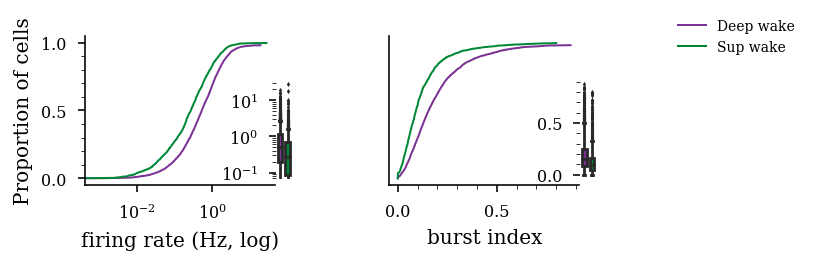

In [17]:
group_colors = {"Deep_WAKEepisode": '#7b3294',
            'Superficial_WAKEepisode': '#008837'
            } 
temp_df = df_states[(df_states.putativeCellType=="Pyramidal Cell") & (df_states.brainRegion.str.contains("CA1"))]
temp_df['state_layer'] = temp_df.deepSuperficial+temp_df.state

fig, axs = plt.subplots(1,2, figsize=functions.set_size('thesis', fraction=.75, subplots=(1, 2)), edgecolor='k')
fig.subplots_adjust(hspace = 0, wspace=.6)
axs = axs.ravel()

plot_ecdf("firingRate",temp_df,"_WAKEepisode","Deep",axs[0],group_colors)
plot_ecdf("firingRate",temp_df,"_WAKEepisode","Superficial",axs[0],group_colors)

# plot_ecdf("firingRate",temp_df,"_NREMepisode","Deep",axs[0],group_colors)
# plot_ecdf("firingRate",temp_df,"_NREMepisode","Superficial",axs[0],group_colors)
axs[0].set_xscale('log')
axs[0].set_xlabel('firing rate (Hz, log)')
axs[0].set_ylabel('Proportion of cells')

plot_ecdf("burstIndex",temp_df,"_WAKEepisode","Deep",axs[1],group_colors,label="Deep wake")
plot_ecdf("burstIndex",temp_df,"_WAKEepisode","Superficial",axs[1],group_colors,label="Sup wake")

# plot_ecdf("burstIndex",temp_df,"_NREMepisode","Deep",axs[1],group_colors,label="Deep NREM")
# plot_ecdf("burstIndex",temp_df,"_NREMepisode","Superficial",axs[1],group_colors,label="Sup NREM")
axs[1].set_xlabel('burst index')
axs[1].axes.get_yaxis().set_ticks([])

for i in range(2):
    right_side = axs[i].spines["right"]
    right_side.set_visible(False)
    top_side = axs[i].spines["top"]
    top_side.set_visible(False)
    axs[i].xaxis.set_minor_locator(AutoMinorLocator())
    axs[i].yaxis.set_minor_locator(AutoMinorLocator())

# plot box plots
ax_ = plot_box(temp_df,"firingRate",axs[0],group_colors,title='',x_offset = .3)
ax_.set_yscale("log") 

plot_box(temp_df,"burstIndex",axs[1],group_colors,title='',x_offset = .3)

# set legend
axs[1].legend(loc='best', bbox_to_anchor=(1.7, 0., 0.5, 1.2),fontsize='x-small',frameon=False)

plt.savefig(os.path.join(fig_save_path,'fr_burst.svg'),dpi=300,bbox_inches='tight')


In [18]:

temp_df['state_sub_layer'] = temp_df.ca1_layer+temp_df.state


C:\Users\Cornell\AppData\Local\Temp/ipykernel_21604/2427489641.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [19]:
display(temp_df.groupby(['deepSuperficial','state']).count())

print('n sessions',temp_df.basepath.unique().shape)
print('n animals',temp_df.animal.unique().shape)


unit_id  basepath  basename  animal  \
deepSuperficial state                                               
Deep            _NREMepisode     3508      3508      3508    3508   
                _NREMpacket      3508      3508      3508    3508   
                _NREMstate       3508      3508      3508    3508   
                _WAKEepisode     3508      3508      3508    3508   
                _WAKEstate       3508      3508      3508    3508   
Superficial     _NREMepisode     1690      1690      1690    1690   
                _NREMpacket      1690      1690      1690    1690   
                _NREMstate       1690      1690      1690    1690   
                _WAKEepisode     1690      1690      1690    1690   
                _WAKEstate       1690      1690      1690    1690   

                              putativeCellType  brainRegion  \
deepSuperficial state                                         
Deep            _NREMepisode              3508         3508   
                _NREMpacket               3508         3508   
                _NREMstate                3508         3508   
                _WAKEepisode              3508         3508   
                _WAKEstate                3508         3508   
Superficial     _NREMepisode              1690         1690   
                _NREMpacket               1690         1690   
                _NREMstate                1690         1690   
                _WAKEepisode              1690         1690   
                _WAKEstate                1690         1690   

                              deepSuperficialDistance  ca1_layer  rem_shift  \
deepSuperficial state                                                         
Deep            _NREMepisode                     3508       3504       3508   
                _NREMpacket                      3508       3504       3508   
                _NREMstate                       3508       3504       3508   
                _WAKEepisode                     3508       3504       3508   
                _WAKEstate                       3508       3504       3508   
Superficial     _NREMepisode                     1690       1686       1690   
                _NREMpacket                      1690       1686       1690   
                _NREMstate                       1690       1686       1690   
                _WAKEepisode                     1690       1686       1690   
                _WAKEstate                       1690       1686       1690   

                              non_rem_shift  ...  firingRate  rankorder  \
deepSuperficial state                        ...                          
Deep            _NREMepisode           3508  ...        3491       2654   
                _NREMpacket            3508  ...        3491       2642   
                _NREMstate             3508  ...        3508       2652   
                _WAKEepisode           3508  ...        3441       2597   
                _WAKEstate             3508  ...        3441       2595   
Superficial     _NREMepisode           1690  ...        1684       1035   
                _NREMpacket            1690  ...        1684       1035   
                _NREMstate             1690  ...        1690       1038   
                _WAKEepisode           1690  ...        1685       1030   
                _WAKEstate             1690  ...        1685       1029   

                              ripple_FRall  ripple_FRparticip  ripple_GainAll  \
deepSuperficial state                                                           
Deep            _NREMepisode          3458               3454            3458   
                _NREMpacket           3458               3442            3458   
                _NREMstate            3475               3452            3475   
                _WAKEepisode          3408               3385            3408   
                _WAKEstate            3408               3378            3408   
Superficial     _NREMepisod

n sessions (167,)
n animals (30,)


In [20]:
temp_df

unit_id                 basepath basename animal putativeCellType  \
0           0  Z:\Data\AYAold\AB1\day1     day1    AB1   Pyramidal Cell   
1           1  Z:\Data\AYAold\AB1\day1     day1    AB1   Pyramidal Cell   
4           7  Z:\Data\AYAold\AB1\day1     day1    AB1   Pyramidal Cell   
5           8  Z:\Data\AYAold\AB1\day1     day1    AB1   Pyramidal Cell   
6          10  Z:\Data\AYAold\AB1\day1     day1    AB1   Pyramidal Cell   
...       ...                      ...      ...    ...              ...   
6174    18008        Z:\Data\HMC1\day8     day8   HMC1   Pyramidal Cell   
6175    18009        Z:\Data\HMC1\day8     day8   HMC1   Pyramidal Cell   
6176    18010        Z:\Data\HMC1\day8     day8   HMC1   Pyramidal Cell   
6177    18011        Z:\Data\HMC1\day8     day8   HMC1   Pyramidal Cell   
6178    18012        Z:\Data\HMC1\day8     day8   HMC1   Pyramidal Cell   

     brainRegion deepSuperficial  deepSuperficialDistance    ca1_layer  \
0          CA1so            Deep                   -150.0         Deep   
1          CA1sr     Superficial                    200.0  Superficial   
4          CA1so            Deep                      0.0       Middle   
5          CA1sr     Superficial                    150.0  Superficial   
6          CA1so            Deep                      0.0       Middle   
...          ...             ...                      ...          ...   
6174       CA1sp            Deep                   -105.0         Deep   
6175       CA1sp            Deep                    -30.0          NaN   
6176       CA1sr     Superficial                    180.0  Superficial   
6177       CA1sp            Deep                    -30.0          NaN   
6178       CA1sp     Superficial                     15.0       Middle   

     rem_shift  ... rankorder ripple_FRall  ripple_FRparticip ripple_GainAll  \
0      unknown  ...  0.769231     0.163729           7.376177       1.270564   
1      unknown  ...  0.642857     0.202253           7.270151       3.661533   
4      unknown  ...  0.555556     1.974374          11.032531       2.691497   
5      unknown  ...  0.538095     1.743227           9.481053       3.194048   
6      unknown  ...  0.405405    17.547847          24.756601       1.626294   
...        ...  ...       ...          ...                ...            ...   
6174   unknown  ...  0.514370     0.930959          10.870226       4.319289   
6175   unknown  ...  0.576087     3.290940           8.795779       3.188220   
6176   unknown  ...  0.594162     2.111725           9.159155       5.775205   
6177   unknown  ...  0.537171     2.640820          11.237678       3.378727   
6178   unknown  ...  0.483146     6.687388          18.749783       4.056724   

      ripple_GainParticip  ripple_nSpkParticip  ripple_particip         state  \
0               52.989996             1.000000         0.023977  _WAKEepisode   
1              136.632998             1.105263         0.026798  _WAKEepisode   
4               15.025757             1.614173         0.179126  _WAKEepisode   
5               17.692031             1.414062         0.180536  _WAKEepisode   
6                2.348356             3.710794         0.692525  _WAKEepisode   
...                   ...                  ...              ...           ...   
6174            50.116844             1.818182         0.086184    _NREMstate   
6175             8.615170             1.496824         0.370071    _NREMstate   
6176            25.713092             1.582558         0.224602    _NREMstate   
6177            14.634779             1.925339         0.230870    _NREMstate   
6178            11.600593             3.218820         0.349700    _NREMstate   

                  state_layer          state_sub_layer  
0            Deep_WAKEepisode         Deep_WAKEepisode  
1     Superficial_WAKEepisode  Superficial_WAKEepisode  
4            Deep_WAKEepisode       Middle_WAKEepisode  
5     Superficial_WAKEepisode  Superficial_WAKEepisode

C:\Users\Cornell\AppData\Local\Temp/ipykernel_21604/4178713963.py:84: UserWarning: AutoMinorLocator does not work with logarithmic scale
C:\Users\Cornell\anaconda3\envs\ripple_diversity\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: AutoMinorLocator does not work with logarithmic scale


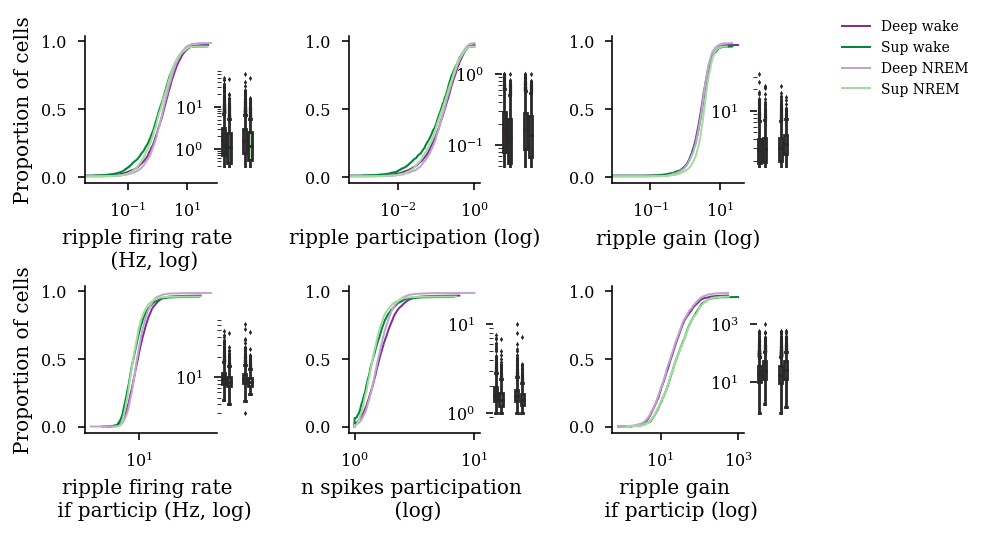

In [21]:
group_colors = {"Deep_WAKEepisode": '#7b3294',
            "Deep_NREMepisode": '#c2a5cf',
            'Superficial_WAKEepisode': '#008837',
            'Superficial_NREMepisode': '#a6dba0'} 

fig, axs = plt.subplots(2,3, figsize=functions.set_size('thesis', fraction=1, subplots=(1, 1)), edgecolor='k')
fig.subplots_adjust(hspace = 0.7, wspace=1)
axs = axs.ravel()

plot_ecdf("ripple_FRall",temp_df,"_WAKEepisode","Deep",axs[0],group_colors)
plot_ecdf("ripple_FRall",temp_df,"_WAKEepisode","Superficial",axs[0],group_colors)
plot_ecdf("ripple_FRall",temp_df,"_NREMepisode","Deep",axs[0],group_colors)
plot_ecdf("ripple_FRall",temp_df,"_NREMepisode","Superficial",axs[0],group_colors)
axs[0].set_xscale('log')
axs[0].set_xlabel('ripple firing rate \n (Hz, log)')
axs[0].set_ylabel('Proportion of cells')

plot_ecdf("ripple_particip",temp_df,"_WAKEepisode","Deep",axs[1],group_colors)
plot_ecdf("ripple_particip",temp_df,"_WAKEepisode","Superficial",axs[1],group_colors)
plot_ecdf("ripple_particip",temp_df,"_NREMepisode","Deep",axs[1],group_colors)
plot_ecdf("ripple_particip",temp_df,"_NREMepisode","Superficial",axs[1],group_colors)
axs[1].set_xscale("log") 
axs[1].set_xlabel('ripple participation (log)')

plot_ecdf("ripple_GainAll",temp_df,"_WAKEepisode","Deep",axs[2],group_colors,label="Deep wake")
plot_ecdf("ripple_GainAll",temp_df,"_WAKEepisode","Superficial",axs[2],group_colors,label="Sup wake")
plot_ecdf("ripple_GainAll",temp_df,"_NREMepisode","Deep",axs[2],group_colors,label="Deep NREM")
plot_ecdf("ripple_GainAll",temp_df,"_NREMepisode","Superficial",axs[2],group_colors,label="Sup NREM")
axs[2].set_xscale("log") 
axs[2].set_xlabel('ripple gain (log)')


plot_ecdf("ripple_FRparticip",temp_df,"_WAKEepisode","Deep",axs[3],group_colors)
plot_ecdf("ripple_FRparticip",temp_df,"_WAKEepisode","Superficial",axs[3],group_colors)
plot_ecdf("ripple_FRparticip",temp_df,"_NREMepisode","Deep",axs[3],group_colors)
plot_ecdf("ripple_FRparticip",temp_df,"_NREMepisode","Superficial",axs[3],group_colors)
axs[3].set_xscale('log')
axs[3].set_xlabel('ripple firing rate \n if particip (Hz, log)')
axs[3].set_ylabel('Proportion of cells')

plot_ecdf("ripple_nSpkParticip",temp_df,"_WAKEepisode","Deep",axs[4],group_colors)
plot_ecdf("ripple_nSpkParticip",temp_df,"_WAKEepisode","Superficial",axs[4],group_colors)
plot_ecdf("ripple_nSpkParticip",temp_df,"_NREMepisode","Deep",axs[4],group_colors)
plot_ecdf("ripple_nSpkParticip",temp_df,"_NREMepisode","Superficial",axs[4],group_colors)
axs[4].set_xscale('log')
axs[4].set_xlabel('n spikes participation \n (log)')

plot_ecdf("ripple_GainParticip",temp_df,"_WAKEepisode","Deep",axs[5],group_colors)
plot_ecdf("ripple_GainParticip",temp_df,"_WAKEepisode","Superficial",axs[5],group_colors)
plot_ecdf("ripple_GainParticip",temp_df,"_NREMepisode","Deep",axs[5],group_colors)
plot_ecdf("ripple_GainParticip",temp_df,"_NREMepisode","Superficial",axs[5],group_colors)
axs[5].set_xscale('log')
axs[5].set_xlabel('ripple gain \n if particip (log)')

for i in range(6):
    right_side = axs[i].spines["right"]
    right_side.set_visible(False)
    top_side = axs[i].spines["top"]
    top_side.set_visible(False)
    axs[i].xaxis.set_minor_locator(AutoMinorLocator())

# plot box plots
ax_ = plot_box(temp_df,"ripple_FRall",axs[0],group_colors,x_offset=.16)
ax_.set_yscale("log") 

ax_ = plot_box(temp_df,"ripple_particip",axs[1],group_colors,x_offset=.18)
ax_.set_yscale("log") 

ax_ = plot_box(temp_df,"ripple_GainAll",axs[2],group_colors,x_offset=.17)
ax_.set_yscale("log") 

ax_ = plot_box(temp_df,"ripple_FRparticip",axs[3],group_colors,x_offset=.16)
ax_.set_yscale("log") 

ax_ = plot_box(temp_df,"ripple_nSpkParticip",axs[4],group_colors,x_offset=.17)
ax_.set_yscale("log") 

ax_ = plot_box(temp_df,"ripple_GainParticip",axs[5],group_colors,x_offset=.17)
ax_.set_yscale("log") 

# set legend
axs[2].legend(loc='best', bbox_to_anchor=(2.3, 0., 0.5, 1.2),fontsize='x-small',frameon=False)

plt.savefig(os.path.join(fig_save_path,'ripple_features.svg'),dpi=300,bbox_inches='tight')

# Look at how features change between states

C:\Users\Cornell\AppData\Local\Temp/ipykernel_21604/4052372258.py:62: UserWarning: AutoMinorLocator does not work with logarithmic scale
C:\Users\Cornell\AppData\Local\Temp/ipykernel_21604/4052372258.py:62: UserWarning: AutoMinorLocator does not work with logarithmic scale
C:\Users\Cornell\anaconda3\envs\ripple_diversity\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: AutoMinorLocator does not work with logarithmic scale


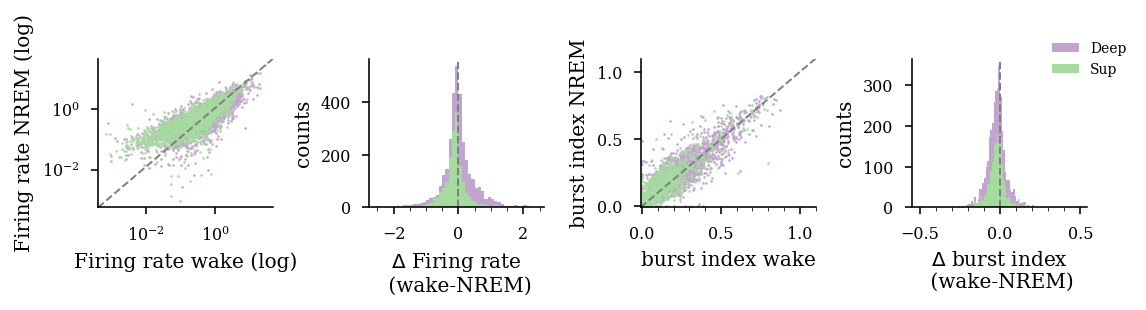

In [22]:
fig, axs = plt.subplots(1,4, figsize=functions.set_size('thesis', fraction=1.5, subplots=(1, 4)), edgecolor='k')
fig.subplots_adjust(hspace = 0.7, wspace=.55)
axs = axs.ravel()

axs[0].scatter(temp_df[temp_df.state_layer=="Deep_WAKEepisode"].firingRate,
                temp_df[temp_df.state_layer=="Deep_NREMepisode"].firingRate,
                color=group_colors['Deep_NREMepisode'],s=1)

axs[0].scatter(temp_df[temp_df.state_layer=="Superficial_WAKEepisode"].firingRate,
                temp_df[temp_df.state_layer=="Superficial_NREMepisode"].firingRate,
                color=group_colors['Superficial_NREMepisode'],s=1)

axs[0].set_xscale('log')                
axs[0].set_yscale('log')   
axs[0].plot([0, 1], [0, 1], transform=axs[0].transAxes,color='grey',ls='--',linewidth=1)
axs[0].set_xlabel('Firing rate wake (log)')
axs[0].set_ylabel('Firing rate NREM (log)')


axs[1].hist(temp_df[temp_df.state_layer=="Deep_WAKEepisode"].firingRate-temp_df[temp_df.state_layer=="Deep_NREMepisode"].firingRate,
            color=group_colors['Deep_NREMepisode'],bins=np.arange(-2.5,2.5,.1))
axs[1].hist(temp_df[temp_df.state_layer=="Superficial_WAKEepisode"].firingRate-temp_df[temp_df.state_layer=="Superficial_NREMepisode"].firingRate,
            color=group_colors['Superficial_NREMepisode'],bins=np.arange(-2.5,2.5,.1))

axs[1].axvline(x=0,color='grey',ls='--',linewidth=1)
axs[1].set_xlabel('$\Delta$ Firing rate \n (wake-NREM)')
axs[1].set_ylabel('counts')



axs[2].scatter(temp_df[temp_df.state_layer=="Deep_WAKEepisode"].burstIndex,
                temp_df[temp_df.state_layer=="Deep_NREMepisode"].burstIndex,
                color=group_colors['Deep_NREMepisode'],s=1)

axs[2].scatter(temp_df[temp_df.state_layer=="Superficial_WAKEepisode"].burstIndex,
                temp_df[temp_df.state_layer=="Superficial_NREMepisode"].burstIndex,
                color=group_colors['Superficial_NREMepisode'],s=1)
axs[2].set_xlim(-.01,1.1)
axs[2].set_ylim(-.01,1.1)
axs[2].plot([0, 1], [0, 1], transform=axs[2].transAxes,color='grey',ls='--',linewidth=1)
axs[2].set_xlabel('burst index wake')
axs[2].set_ylabel('burst index NREM')


axs[3].hist(temp_df[temp_df.state_layer=="Deep_WAKEepisode"].burstIndex-temp_df[temp_df.state_layer=="Deep_NREMepisode"].burstIndex,
            color=group_colors['Deep_NREMepisode'],bins=np.arange(-.5,.5,.01),label="Deep")
axs[3].hist(temp_df[temp_df.state_layer=="Superficial_WAKEepisode"].burstIndex-temp_df[temp_df.state_layer=="Superficial_NREMepisode"].burstIndex,
            color=group_colors['Superficial_NREMepisode'],bins=np.arange(-.5,.5,.01),label="Sup")

axs[3].axvline(x=0,color='grey',ls='--',linewidth=1)
axs[3].set_xlabel('$\Delta$ burst index \n (wake-NREM)')
axs[3].set_ylabel('counts')
axs[3].legend(loc='best', bbox_to_anchor=(.8, 0., 0.5, 1.2),fontsize='x-small',frameon=False)

for i in range(4):
    right_side = axs[i].spines["right"]
    right_side.set_visible(False)
    top_side = axs[i].spines["top"]
    top_side.set_visible(False)
    axs[i].xaxis.set_minor_locator(AutoMinorLocator())

plt.savefig(os.path.join(fig_save_path,'wake_nrem_compare.pdf'),dpi=300,bbox_inches='tight')

# KDE plots of the features above

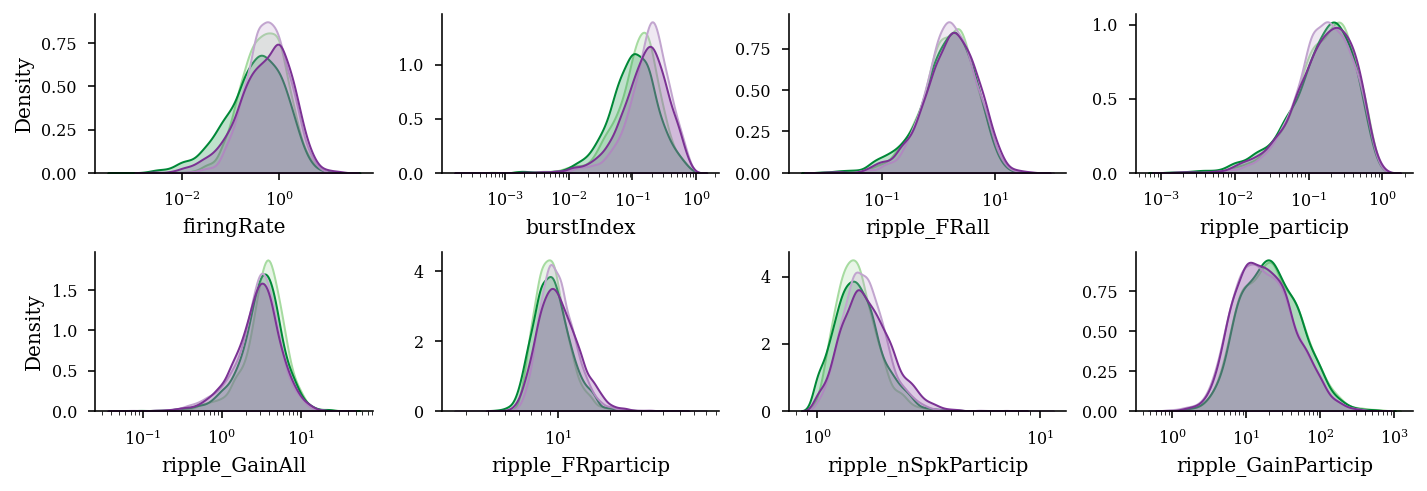

In [312]:
def plot_hist(df,var,group_colors,ax,binrange=[],log=False):
    sns.kdeplot(
                data=df,
                x=var, hue="state_layer",
                hue_order=group_colors.keys(),
                ax=ax,
                log_scale = log,    
                legend=False,
                common_norm=False,
                fill=True,
                alpha=.25, 
                linewidth=1
                )
    
temp_df_2 = temp_df
temp_df_2 = temp_df_2.replace([np.inf, -np.inf], np.nan)
temp_df_2 = temp_df_2.dropna()

fig, axs = plt.subplots(2,4, figsize=functions.set_size('thesis', fraction=2, subplots=(2, 4)), edgecolor='k')
fig.subplots_adjust(hspace = 0.5, wspace=.25)
axs = axs.ravel()

sns.set_palette(sns.color_palette(group_colors.values()))

plot_hist(temp_df_2,"firingRate",group_colors,axs[0],log=True)
plot_hist(temp_df_2[temp_df_2.burstIndex>0],"burstIndex",group_colors,axs[1],log=True)
plot_hist(temp_df_2,"ripple_FRall",group_colors,axs[2],log=True)
plot_hist(temp_df_2,"ripple_particip",group_colors,axs[3],log=True)
plot_hist(temp_df_2,"ripple_GainAll",group_colors,axs[4],log=True)
plot_hist(temp_df_2,"ripple_FRparticip",group_colors,axs[5],log=True)
plot_hist(temp_df_2,"ripple_nSpkParticip",group_colors,axs[6],log=True)
plot_hist(temp_df_2,"ripple_GainParticip",group_colors,axs[7],log=True)

axs[1].set_ylabel("")
axs[2].set_ylabel("")
axs[3].set_ylabel("")
axs[5].set_ylabel("")
axs[6].set_ylabel("")
axs[7].set_ylabel("")

for i in range(8):
    right_side = axs[i].spines["right"]
    right_side.set_visible(False)
    top_side = axs[i].spines["top"]
    top_side.set_visible(False)

plt.savefig(os.path.join(fig_save_path,'properties_kde.pdf'),dpi=300,bbox_inches='tight')

# scatter baseline fr x burstiness x ripple metrics

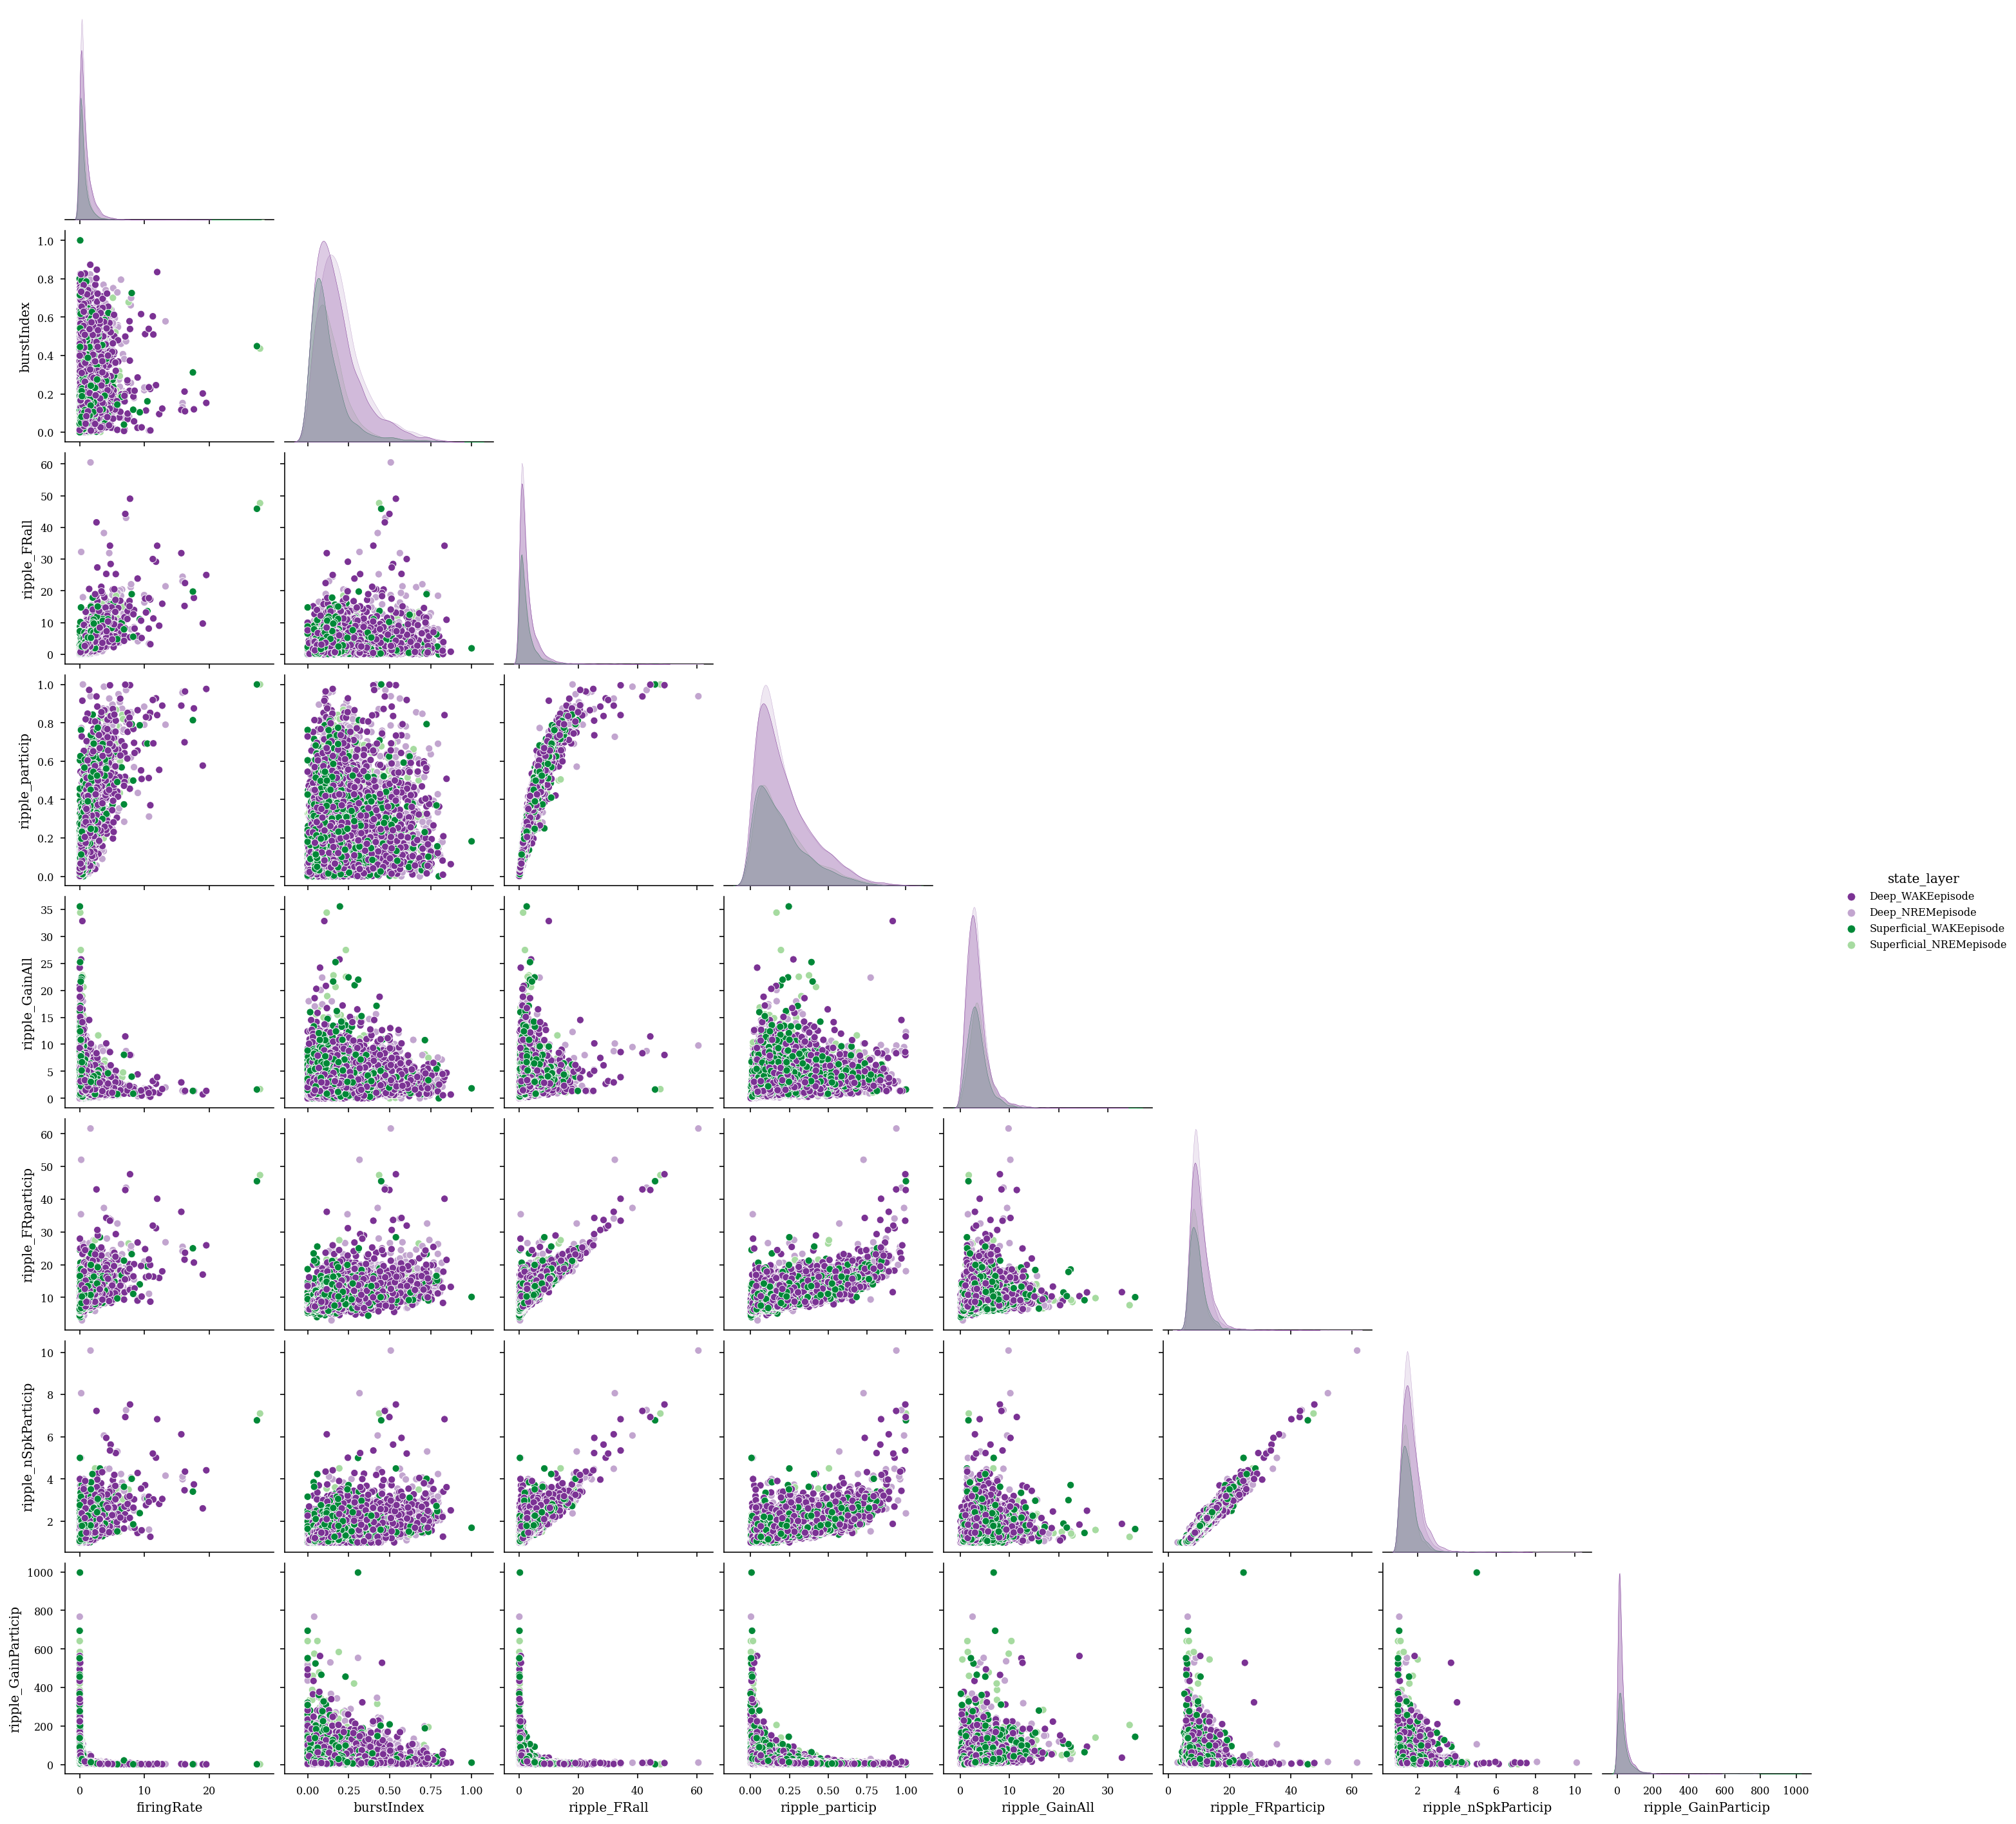

In [313]:
sns.pairplot(temp_df,
            hue="state_layer",
            hue_order=group_colors.keys(),
            corner=True,
            vars=["firingRate","burstIndex","ripple_FRall","ripple_particip","ripple_GainAll","ripple_FRparticip","ripple_nSpkParticip","ripple_GainParticip"])

plt.savefig(os.path.join(fig_save_path,'many_fr_ripple_comparisons.pdf'),dpi=300,bbox_inches='tight')
plt.savefig(os.path.join(fig_save_path,'many_fr_ripple_comparisons.png'),dpi=300,bbox_inches='tight')

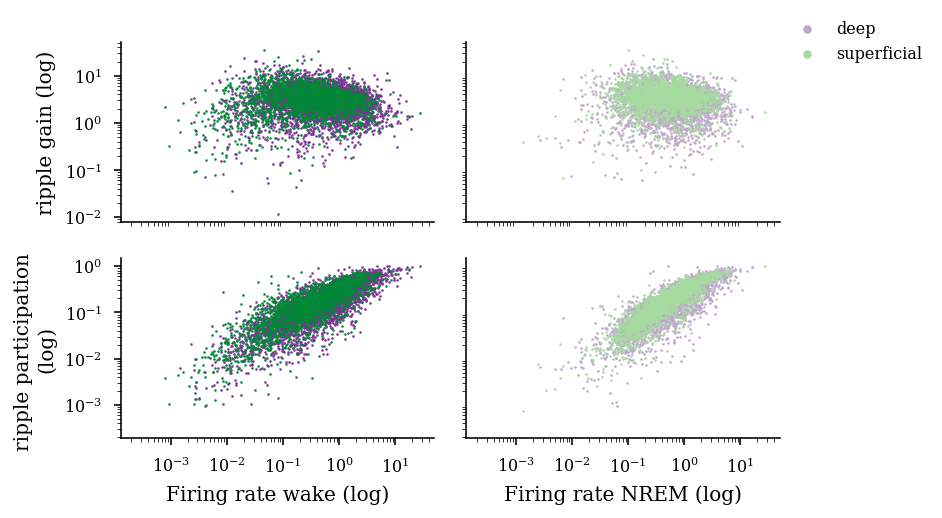

In [314]:
fig, axs = plt.subplots(2,2, figsize=functions.set_size('thesis', fraction=1, subplots=(2, 2)), edgecolor='k')
fig.subplots_adjust(hspace = 0.2, wspace=.1)
axs = axs.ravel()

axs[0].scatter(temp_df[temp_df.state_layer=="Deep_WAKEepisode"].firingRate,
                temp_df[temp_df.state_layer=="Deep_WAKEepisode"].ripple_GainAll,
                color=group_colors['Deep_WAKEepisode'],s=1)

axs[0].scatter(temp_df[temp_df.state_layer=="Superficial_WAKEepisode"].firingRate,
                temp_df[temp_df.state_layer=="Superficial_WAKEepisode"].ripple_GainAll,
                color=group_colors['Superficial_WAKEepisode'],s=1)

axs[0].set_xscale('log')                
axs[0].set_yscale('log')   
axs[0].set_xlabel('')
axs[0].set_ylabel('ripple gain (log)')


axs[1].scatter(temp_df[temp_df.state_layer=="Deep_NREMepisode"].firingRate,
                temp_df[temp_df.state_layer=="Deep_NREMepisode"].ripple_GainAll,
                color=group_colors['Deep_NREMepisode'],s=1,label="deep")

axs[1].scatter(temp_df[temp_df.state_layer=="Superficial_NREMepisode"].firingRate,
                temp_df[temp_df.state_layer=="Superficial_NREMepisode"].ripple_GainAll,
                color=group_colors['Superficial_NREMepisode'],s=1,label="superficial")

axs[1].set_xscale('log')                
axs[1].set_yscale('log')   
axs[1].set_xlabel('')
axs[1].set_ylabel('')
axs[1].legend(loc='best', bbox_to_anchor=(1, 0., 0.5, 1.2),frameon=False,markerscale=4)



axs[2].scatter(temp_df[temp_df.state_layer=="Deep_WAKEepisode"].firingRate,
                temp_df[temp_df.state_layer=="Deep_WAKEepisode"].ripple_particip,
                color=group_colors['Deep_WAKEepisode'],s=1)

axs[2].scatter(temp_df[temp_df.state_layer=="Superficial_WAKEepisode"].firingRate,
                temp_df[temp_df.state_layer=="Superficial_WAKEepisode"].ripple_particip,
                color=group_colors['Superficial_WAKEepisode'],s=1)

axs[2].set_xscale('log')                
axs[2].set_yscale('log')   
axs[2].set_xlabel('Firing rate wake (log)')
axs[2].set_ylabel('ripple participation \n(log)')


axs[3].scatter(temp_df[temp_df.state_layer=="Deep_NREMepisode"].firingRate,
                temp_df[temp_df.state_layer=="Deep_NREMepisode"].ripple_particip,
                color=group_colors['Deep_NREMepisode'],s=1)

axs[3].scatter(temp_df[temp_df.state_layer=="Superficial_NREMepisode"].firingRate,
                temp_df[temp_df.state_layer=="Superficial_NREMepisode"].ripple_particip,
                color=group_colors['Superficial_NREMepisode'],s=1)

axs[3].set_xscale('log')                
axs[3].set_yscale('log')   
axs[3].set_xlabel('Firing rate NREM (log)')
axs[3].set_ylabel('')

axs[0].axes.get_xaxis().set_ticks([])
axs[1].axes.get_xaxis().set_ticks([])

axs[1].axes.get_yaxis().set_ticks([])
axs[3].axes.get_yaxis().set_ticks([])

set_equal_axis_range(axs[0],axs[1])
set_equal_axis_range(axs[2],axs[3])

for i in range(4):
    right_side = axs[i].spines["right"]
    right_side.set_visible(False)
    top_side = axs[i].spines["top"]
    top_side.set_visible(False)

plt.savefig(os.path.join(fig_save_path,'fr_ripple_par_gain_log.pdf'),dpi=300,bbox_inches='tight')


# Compare rem shifting vs. non-rem shifting

In [315]:
def plot_hist(df,var,group_colors,ax,log=False,legend=False,cumulative=False,fill=True):
    if cumulative:
        fill=False
    sns.kdeplot(
                data=df,
                x=var, hue="state_layer",
                hue_order=group_colors.keys(),
                ax=ax,
                log_scale = log,    
                legend=legend,
                common_norm=False,
                fill=fill,
                alpha=.25, 
                linewidth=1,
                cumulative=cumulative
                )

group_colors = {"rem_shifting_WAKEepisode": '#7b3294',
            "rem_shifting_NREMepisode": '#c2a5cf',
            'non_rem_shifting_WAKEepisode': '#008837',
            'non_rem_shifting_NREMepisode': '#a6dba0'} 

C:\Users\Cornell\AppData\Local\Temp/ipykernel_25004/3008344698.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


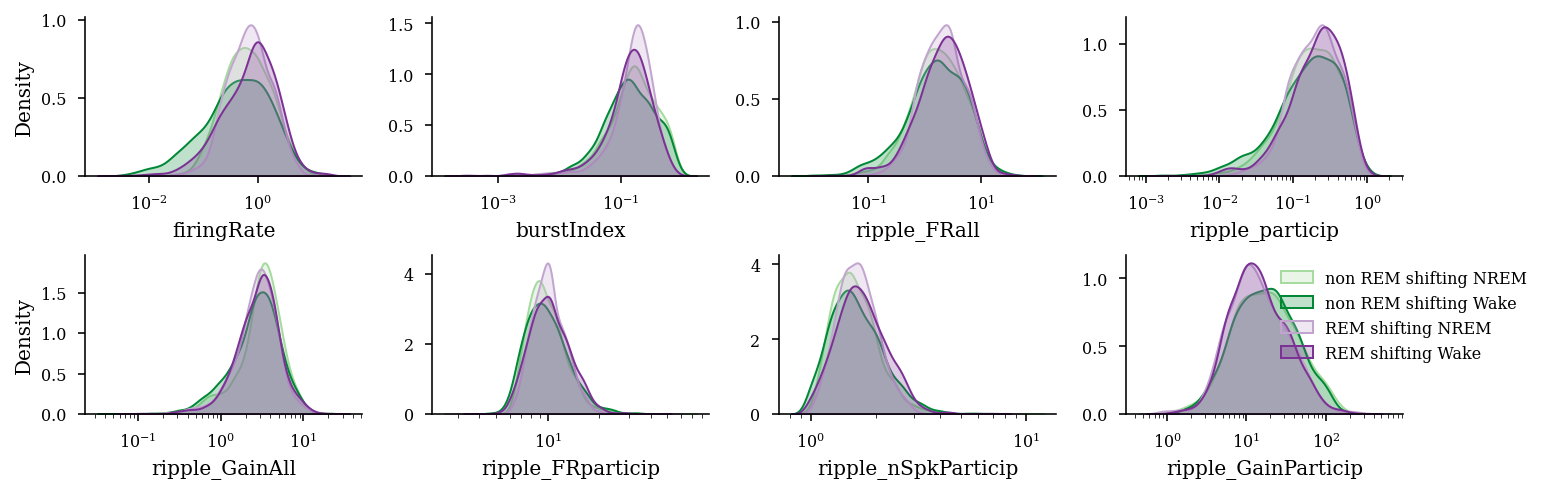

In [316]:
temp_df = df_states[(df_states.putativeCellType=="Pyramidal Cell") & (df_states.brainRegion.str.contains("CA1"))]
temp_df['state_layer'] = temp_df.rem_shift+temp_df.state

temp_df_2 = temp_df
temp_df_2 = temp_df_2.replace([np.inf, -np.inf], np.nan)
temp_df_2 = temp_df_2.dropna()

fig, axs = plt.subplots(2,4, figsize=functions.set_size('thesis', fraction=2, subplots=(2, 4)), edgecolor='k')
fig.subplots_adjust(hspace = 0.5, wspace=.25)
axs = axs.ravel()

sns.set_palette(sns.color_palette(group_colors.values()))

plot_hist(temp_df_2,"firingRate",group_colors,axs[0],log=True)
plot_hist(temp_df_2[temp_df_2.burstIndex>0],"burstIndex",group_colors,axs[1],log=True)
plot_hist(temp_df_2,"ripple_FRall",group_colors,axs[2],log=True)
plot_hist(temp_df_2,"ripple_particip",group_colors,axs[3],log=True)
plot_hist(temp_df_2,"ripple_GainAll",group_colors,axs[4],log=True)
plot_hist(temp_df_2,"ripple_FRparticip",group_colors,axs[5],log=True)
plot_hist(temp_df_2,"ripple_nSpkParticip",group_colors,axs[6],log=True)
plot_hist(temp_df_2,"ripple_GainParticip",group_colors,axs[7],log=True,legend=True)

axs[1].set_ylabel("")
axs[2].set_ylabel("")
axs[3].set_ylabel("")
axs[5].set_ylabel("")
axs[6].set_ylabel("")
axs[7].set_ylabel("")

for i in range(8):
    right_side = axs[i].spines["right"]
    right_side.set_visible(False)
    top_side = axs[i].spines["top"]
    top_side.set_visible(False)

plt.legend(labels=["non REM shifting NREM","non REM shifting Wake","REM shifting NREM","REM shifting Wake"],
            loc='best',
            bbox_to_anchor=(1, 0., 0.5, 1),
            frameon=False,markerscale=.5)

# plt.savefig(os.path.join(fig_save_path,'rem_shift_properties_kde.pdf'),dpi=300,bbox_inches='tight')

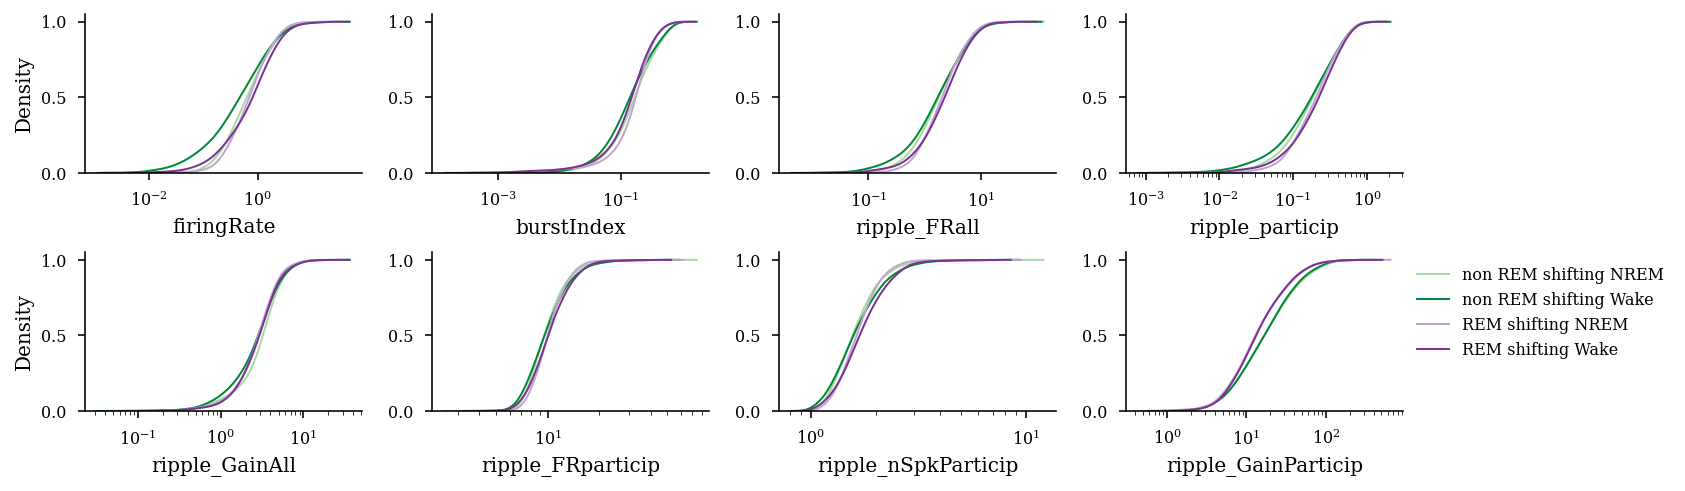

In [317]:
fig, axs = plt.subplots(2,4, figsize=functions.set_size('thesis', fraction=2, subplots=(2, 4)), edgecolor='k')
fig.subplots_adjust(hspace = 0.5, wspace=.25)
axs = axs.ravel()

sns.set_palette(sns.color_palette(group_colors.values()))

plot_hist(temp_df_2,"firingRate",group_colors,axs[0],log=True,cumulative=True)
plot_hist(temp_df_2[temp_df_2.burstIndex>0],"burstIndex",group_colors,axs[1],log=True,cumulative=True)
plot_hist(temp_df_2,"ripple_FRall",group_colors,axs[2],log=True,cumulative=True)
plot_hist(temp_df_2,"ripple_particip",group_colors,axs[3],log=True,cumulative=True)
plot_hist(temp_df_2,"ripple_GainAll",group_colors,axs[4],log=True,cumulative=True)
plot_hist(temp_df_2,"ripple_FRparticip",group_colors,axs[5],log=True,cumulative=True)
plot_hist(temp_df_2,"ripple_nSpkParticip",group_colors,axs[6],log=True,cumulative=True)
plot_hist(temp_df_2,"ripple_GainParticip",group_colors,axs[7],log=True,legend=True,cumulative=True)

axs[1].set_ylabel("")
axs[2].set_ylabel("")
axs[3].set_ylabel("")
axs[5].set_ylabel("")
axs[6].set_ylabel("")
axs[7].set_ylabel("")

for i in range(8):
    right_side = axs[i].spines["right"]
    right_side.set_visible(False)
    top_side = axs[i].spines["top"]
    top_side.set_visible(False)

plt.legend(labels=["non REM shifting NREM","non REM shifting Wake","REM shifting NREM","REM shifting Wake"],
            loc='best',
            bbox_to_anchor=(1, 0., 0.5, 1),
            frameon=False,markerscale=.5)

# plt.savefig(os.path.join(fig_save_path,'rem_shift_properties_kde.pdf'),dpi=300,bbox_inches='tight')

# Compare deep REM shifting vs. superficial non-REM shifting

[0.2636449480642115, 0.12719455392332496]


(681.1815600904274,
 3.6980861302787554e-150,
 1,
 array([[5705.90866906, 2380.09133094],
        [ 985.09133094,  410.90866906]]))

8086


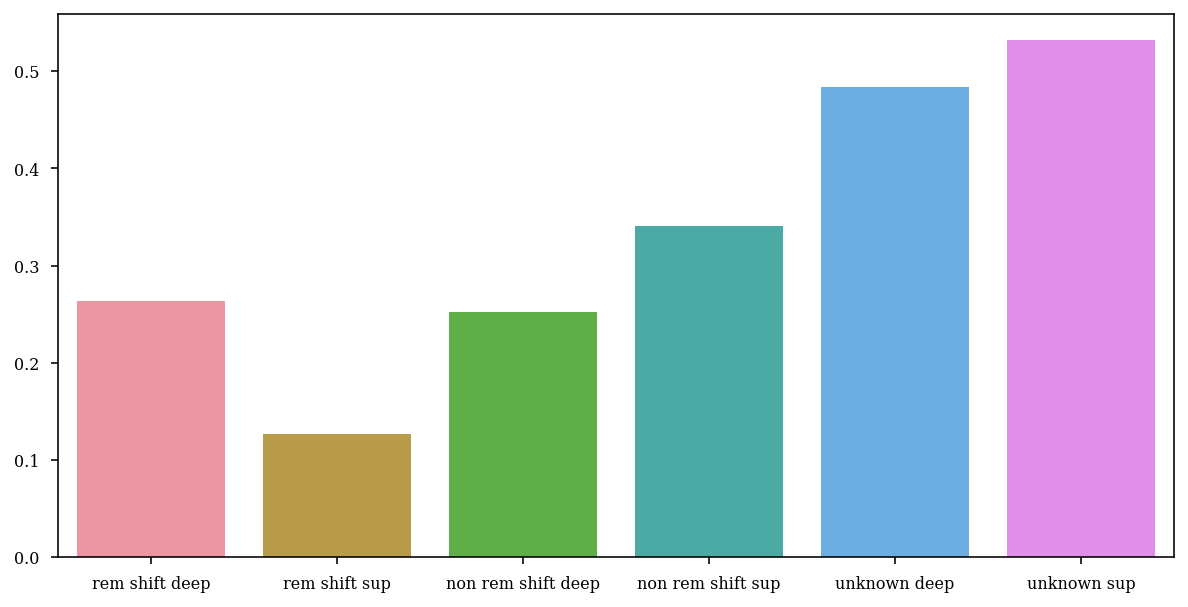

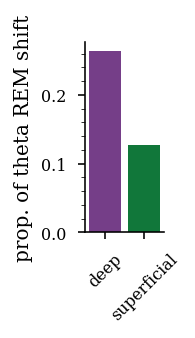

In [318]:
temp_df_prop = df_states[df_states.state == '_WAKEepisode']

y = [np.sum((temp_df_prop.rem_shift == 'rem_shifting') & (temp_df_prop.deepSuperficial == 'Deep')) / np.sum((temp_df_prop.deepSuperficial == 'Deep')),
        np.sum((temp_df_prop.rem_shift == 'rem_shifting') & (temp_df_prop.deepSuperficial == 'Superficial')) / np.sum((temp_df_prop.deepSuperficial == 'Superficial')),
        np.sum((temp_df_prop.rem_shift == 'non_rem_shifting') & (temp_df_prop.deepSuperficial == 'Deep')) / np.sum((temp_df_prop.deepSuperficial == 'Deep')),
        np.sum((temp_df_prop.rem_shift == 'non_rem_shifting') & (temp_df_prop.deepSuperficial == 'Superficial')) / np.sum((temp_df_prop.deepSuperficial == 'Superficial')),
        np.sum((temp_df_prop.rem_shift == 'unknown') & (temp_df_prop.deepSuperficial == 'Deep')) / np.sum((temp_df_prop.deepSuperficial == 'Deep')),
        np.sum((temp_df_prop.rem_shift == 'unknown') & (temp_df_prop.deepSuperficial == 'Superficial')) / np.sum((temp_df_prop.deepSuperficial == 'Superficial'))]

plt.figure(figsize=(10,5))
x = ['rem shift deep', 'rem shift sup', 'non rem shift deep', 'non rem shift sup','unknown deep','unknown sup']
sns.barplot(x=x, y=y)


plt.figure(figsize=functions.set_size('thesis', fraction=.12, subplots=(4, 1)), edgecolor='k')

group_colors = {"rem shift deep": '#7b3294',
            'rem shift sup': '#008837'} 

sns.set_palette(sns.color_palette(group_colors.values()))

y = [np.sum((temp_df_prop.rem_shift == 'rem_shifting') & (temp_df_prop.deepSuperficial == 'Deep')) / np.sum((temp_df_prop.deepSuperficial == 'Deep')),
        np.sum((temp_df_prop.rem_shift == 'rem_shifting') & (temp_df_prop.deepSuperficial == 'Superficial')) / np.sum((temp_df_prop.deepSuperficial == 'Superficial'))]
x = ['deep', 'superficial']

sns.barplot(x=x, y=y)
axs = plt.gca()
for i in range(8):
    right_side = axs.spines["right"]
    right_side.set_visible(False)
    top_side = axs.spines["top"]
    top_side.set_visible(False)
    axs.yaxis.set_minor_locator(AutoMinorLocator())

plt.ylabel('prop. of theta REM shift')
plt.xticks(rotation = 45) # Rotates X-Axis Ticks by 45-degrees

plt.savefig(os.path.join(fig_save_path,'deep_sup_rem_shift_prop.svg'),dpi=300,bbox_inches='tight')

# from scipy.stats import chisquare

# obs = [np.sum((temp_df_prop.rem_shift == 'rem_shifting') & (temp_df_prop.deepSuperficial == 'Deep')),
#                 np.sum((temp_df_prop.rem_shift == 'rem_shifting') & (temp_df_prop.deepSuperficial == 'Superficial'))]
# chisq,p = chisquare(y)
# print(y)
# print(chisq,p)
print(y)
import scipy.stats as stats
n_rem_shift_deep = np.sum((temp_df_prop.rem_shift == 'rem_shifting') & (temp_df_prop.deepSuperficial == 'Deep'))
n_deep = np.sum(temp_df_prop.deepSuperficial == 'Deep')

n_rem_shift_sup = np.sum((temp_df_prop.rem_shift == 'sup_non_shifting') & (temp_df_prop.deepSuperficial == 'Superficial'))
n_sup = np.sum(temp_df_prop.deepSuperficial == 'Superficial')

table_ = np.array([[n_deep,n_sup], [n_rem_shift_deep, n_rem_shift_sup]])
display(stats.chi2_contingency(table_))

print(n_deep+n_sup)
# res = stats.barnard_exact([[n_rem_shift_deep, n_rem_shift_sup], [n_deep-n_rem_shift_deep, n_sup-n_rem_shift_sup]])

In [320]:
temp_df = df_states[(df_states.putativeCellType=="Pyramidal Cell") & (df_states.brainRegion.str.contains("CA1"))]
temp_df['state_layer'] = temp_df.layer_rem_shift.values+temp_df.state.values

temp_df_2 = temp_df
temp_df_2 = temp_df_2.replace([np.inf, -np.inf], np.nan)
temp_df_2 = temp_df_2.dropna()

idx = (
    (temp_df_2.state_layer == "deep_rem_shift_NREMepisode") |
    (temp_df_2.state_layer == "sup_non_rem_shift_NREMepisode") |
    (temp_df_2.state_layer == "deep_rem_shift_WAKEepisode") |
    (temp_df_2.state_layer == "sup_non_rem_shift_WAKEepisode") 
)
temp_df_2 = temp_df_2[idx]

group_colors = {"deep_rem_shift_WAKEepisode": '#7b3294',
            "deep_rem_shift_NREMepisode": '#c2a5cf',
            'sup_non_rem_shift_WAKEepisode': '#008837',
            'sup_non_rem_shift_NREMepisode': '#a6dba0'} 
            

C:\Users\Cornell\AppData\Local\Temp/ipykernel_25004/309904935.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


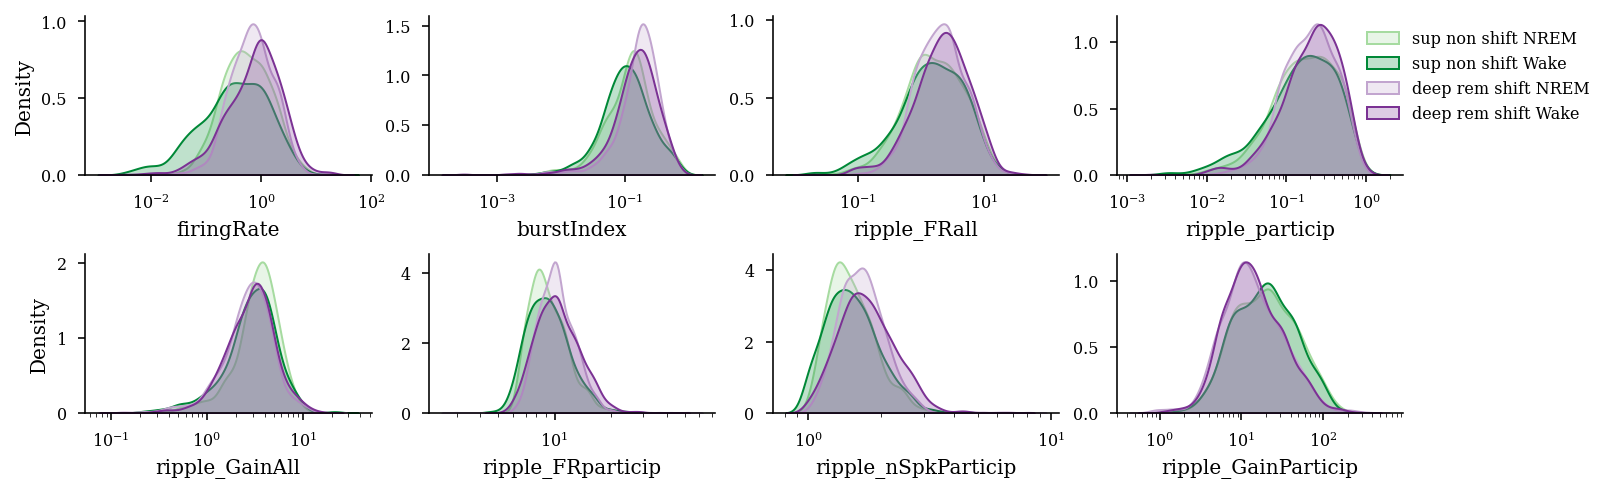

In [321]:
fig, axs = plt.subplots(2,4, figsize=functions.set_size('thesis', fraction=2, subplots=(2, 4)), edgecolor='k')
fig.subplots_adjust(hspace = 0.5, wspace=.2)
axs = axs.ravel()

sns.set_palette(sns.color_palette(group_colors.values()))

plot_hist(temp_df_2,"firingRate",group_colors,axs[0],log=True)
plot_hist(temp_df_2[temp_df_2.burstIndex>0],"burstIndex",group_colors,axs[1],log=True)
plot_hist(temp_df_2,"ripple_FRall",group_colors,axs[2],log=True)
plot_hist(temp_df_2,"ripple_particip",group_colors,axs[3],log=True,legend=True)
plot_hist(temp_df_2,"ripple_GainAll",group_colors,axs[4],log=True)
plot_hist(temp_df_2,"ripple_FRparticip",group_colors,axs[5],log=True)
plot_hist(temp_df_2,"ripple_nSpkParticip",group_colors,axs[6],log=True)
plot_hist(temp_df_2,"ripple_GainParticip",group_colors,axs[7],log=True)

axs[1].set_ylabel("")
axs[2].set_ylabel("")
axs[3].set_ylabel("")
axs[5].set_ylabel("")
axs[6].set_ylabel("")
axs[7].set_ylabel("")

for i in range(8):
    right_side = axs[i].spines["right"]
    right_side.set_visible(False)
    top_side = axs[i].spines["top"]
    top_side.set_visible(False)

axs[3].legend(labels=["sup non shift NREM","sup non shift Wake","deep rem shift NREM","deep rem shift Wake"],
            loc='best',
            bbox_to_anchor=(1.2, 0., 0.5, 1),
            frameon=False,markerscale=.5)

plt.savefig(os.path.join(fig_save_path,'rem_shift_properties_kde.pdf'),dpi=300,bbox_inches='tight')

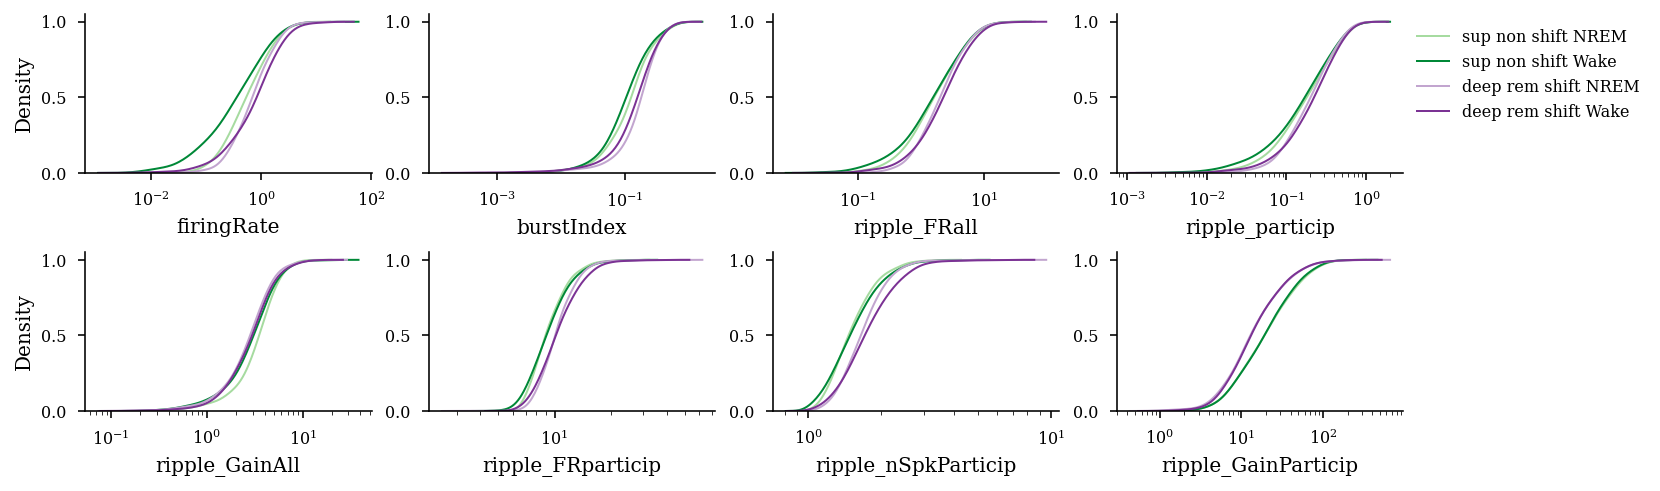

In [322]:
fig, axs = plt.subplots(2,4, figsize=functions.set_size('thesis', fraction=2, subplots=(2, 4)), edgecolor='k')
fig.subplots_adjust(hspace = 0.5, wspace=.2)
axs = axs.ravel()

sns.set_palette(sns.color_palette(group_colors.values()))

plot_hist(temp_df_2,"firingRate",group_colors,axs[0],log=True,cumulative=True)
plot_hist(temp_df_2[temp_df_2.burstIndex>0],"burstIndex",group_colors,axs[1],log=True,cumulative=True)
plot_hist(temp_df_2,"ripple_FRall",group_colors,axs[2],log=True,cumulative=True)
plot_hist(temp_df_2,"ripple_particip",group_colors,axs[3],log=True,legend=True,cumulative=True)
plot_hist(temp_df_2,"ripple_GainAll",group_colors,axs[4],log=True,cumulative=True)
plot_hist(temp_df_2,"ripple_FRparticip",group_colors,axs[5],log=True,cumulative=True)
plot_hist(temp_df_2,"ripple_nSpkParticip",group_colors,axs[6],log=True,cumulative=True)
plot_hist(temp_df_2,"ripple_GainParticip",group_colors,axs[7],log=True,cumulative=True)

axs[1].set_ylabel("")
axs[2].set_ylabel("")
axs[3].set_ylabel("")
axs[5].set_ylabel("")
axs[6].set_ylabel("")
axs[7].set_ylabel("")

for i in range(8):
    right_side = axs[i].spines["right"]
    right_side.set_visible(False)
    top_side = axs[i].spines["top"]
    top_side.set_visible(False)

axs[3].legend(labels=["sup non shift NREM","sup non shift Wake","deep rem shift NREM","deep rem shift Wake"],
            loc='best',
            bbox_to_anchor=(1, 0., 0.5, 1),
            frameon=False,markerscale=.5)

plt.savefig(os.path.join(fig_save_path,'rem_shift_properties_kde_cdf.pdf'),dpi=300,bbox_inches='tight')

In [323]:
print(temp_df_2.keys())
print(temp_df_2.state.unique())
print(temp_df_2.layer_rem_shift.unique())
print(temp_df_2.state_layer.unique())

# temp_df_2[temp_df_2.state == '_WAKEepisode']
print(temp_df_2['state_layer'].value_counts())
print(temp_df_2['basepath'].nunique())
print(temp_df_2['animal'].nunique())

Index(['unit_id', 'basepath', 'basename', 'animal', 'putativeCellType',
       'brainRegion', 'deepSuperficial', 'deepSuperficialDistance',
       'ca1_layer', 'rem_shift', 'non_rem_shift', 'layer_rem_shift',
       'burstIndex', 'cv2', 'firingRateISI', 'firingRate', 'ripple_particip',
       'ripple_FRall', 'ripple_FRparticip', 'ripple_GainAll',
       'ripple_GainParticip', 'ripple_nSpkParticip', 'rankorder', 'state',
       'state_layer'],
      dtype='object')
['_NREMepisode' '_WAKEepisode']
['sup_non_rem_shift' 'deep_rem_shift']
['sup_non_rem_shift_NREMepisode' 'deep_rem_shift_NREMepisode'
 'sup_non_rem_shift_WAKEepisode' 'deep_rem_shift_WAKEepisode']
deep_rem_shift_WAKEepisode       925
deep_rem_shift_NREMepisode       919
sup_non_rem_shift_NREMepisode    566
sup_non_rem_shift_WAKEepisode    562
Name: state_layer, dtype: int64
152
33


In [324]:
def plot_ecdf(var,df,state,sublayer,ax,group_colors,label=""):
        y = df[(df.layer_rem_shift == sublayer) & (df.state == state)]
        if y.empty == False:
            xs, ys = ecdf(y[var])
            ax.plot(xs,ys,color=group_colors[y.layer_rem_shift.iloc[0]+y.state.iloc[0]],linewidth=1,label=label)

In [325]:
temp_df_2.keys()

Index(['unit_id', 'basepath', 'basename', 'animal', 'putativeCellType',
       'brainRegion', 'deepSuperficial', 'deepSuperficialDistance',
       'ca1_layer', 'rem_shift', 'non_rem_shift', 'layer_rem_shift',
       'burstIndex', 'cv2', 'firingRateISI', 'firingRate', 'ripple_particip',
       'ripple_FRall', 'ripple_FRparticip', 'ripple_GainAll',
       'ripple_GainParticip', 'ripple_nSpkParticip', 'rankorder', 'state',
       'state_layer'],
      dtype='object')

In [ ]:
fig, axs = plt.subplots(1,2, figsize=functions.set_size('thesis', fraction=.75, subplots=(1, 2)), edgecolor='k')
fig.subplots_adjust(hspace = 0, wspace=.7)
axs = axs.ravel()

temp_df_2 = temp_df_2[(temp_df_2.state == '_WAKEepisode')]

import custom_plots

group_colors = {"deep_rem_shift_WAKEepisode": '#7b3294',
            'sup_non_rem_shift_WAKEepisode': '#008837'
            } 
custom_plots.plot_ecdf('firingRate',temp_df_2,'state_layer',"deep_rem_shift_WAKEepisode",axs[0],group_colors)
custom_plots.plot_ecdf('firingRate',temp_df_2,'state_layer',"sup_non_rem_shift_WAKEepisode",axs[0],group_colors)
ax = custom_plots.plot_box(temp_df_2,'state_layer','firingRate',axs[0],fig,group_colors,x_offset=.27)
ax.set_yscale('log')

axs[0].set_xscale('log')
axs[0].set_xlabel('firing rate (Hz, log)')
axs[0].set_ylabel('Proportion of cells')

custom_plots.plot_ecdf('burstIndex',temp_df_2,'state_layer',"deep_rem_shift_WAKEepisode",axs[1],group_colors)
custom_plots.plot_ecdf('burstIndex',temp_df_2,'state_layer',"sup_non_rem_shift_WAKEepisode",axs[1],group_colors)
custom_plots.plot_box(temp_df_2,'state_layer','burstIndex',axs[1],fig,group_colors,x_offset=.27)

axs[1].set_xlabel('Burst index')
# axs[1].set_ylabel('Proportion of cells')

for i in range(2):
    right_side = axs[i].spines["right"]
    right_side.set_visible(False)
    top_side = axs[i].spines["top"]
    top_side.set_visible(False)
    axs[i].xaxis.set_minor_locator(AutoMinorLocator())
    axs[i].yaxis.set_minor_locator(AutoMinorLocator())

plt.savefig(os.path.join(fig_save_path,'fr_burst_deep_sup_rem_shift.svg'),dpi=300,bbox_inches='tight')
plt.savefig(os.path.join(fig_save_path,'fr_burst_deep_sup_rem_shift.pdf'),dpi=300,bbox_inches='tight')


### deep/sup shifting fig

C:\Users\Cornell\anaconda3\envs\ripple_diversity\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: AutoMinorLocator does not work with logarithmic scale


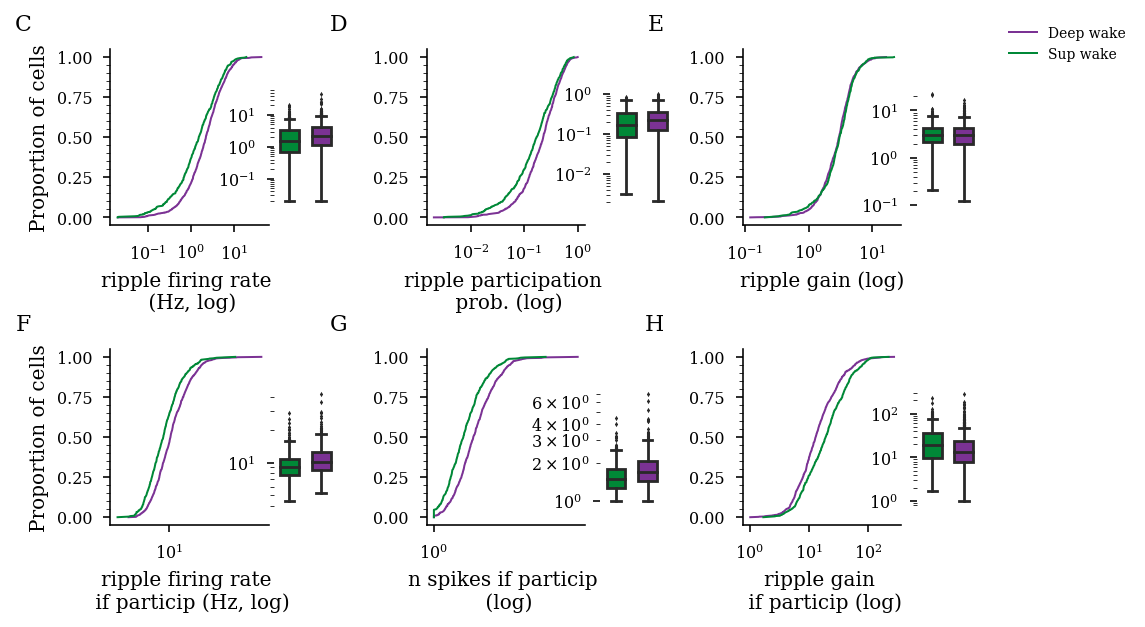

In [327]:
fig, axs = plt.subplots(2,3, figsize=functions.set_size('thesis', fraction=1.2, subplots=(1, 1)), edgecolor='k')
fig.subplots_adjust(hspace = .7, wspace=1)
axs = axs.ravel()

plot_ecdf("ripple_FRall",temp_df_2,"_WAKEepisode","deep_rem_shift",axs[0],group_colors)
plot_ecdf("ripple_FRall",temp_df_2,"_WAKEepisode","sup_non_rem_shift",axs[0],group_colors)
# plot_ecdf("ripple_FRall",temp_df_2,"_NREMepisode","deep_rem_shift",axs[0],group_colors)
# plot_ecdf("ripple_FRall",temp_df_2,"_NREMepisode","sup_non_rem_shift",axs[0],group_colors)
axs[0].set_xscale('log')
axs[0].set_xlabel('ripple firing rate \n (Hz, log)')
axs[0].set_ylabel('Proportion of cells')

plot_ecdf("ripple_particip",temp_df_2,"_WAKEepisode","deep_rem_shift",axs[1],group_colors)
plot_ecdf("ripple_particip",temp_df_2,"_WAKEepisode","sup_non_rem_shift",axs[1],group_colors)
# plot_ecdf("ripple_particip",temp_df_2,"_NREMepisode","deep_rem_shift",axs[1],group_colors)
# plot_ecdf("ripple_particip",temp_df_2,"_NREMepisode","sup_non_rem_shift",axs[1],group_colors)
axs[1].set_xscale('log')
axs[1].set_xlabel('ripple participation \n prob. (log)')

plot_ecdf("ripple_GainAll",temp_df_2,"_WAKEepisode","deep_rem_shift",axs[2],group_colors,label="Deep wake")
plot_ecdf("ripple_GainAll",temp_df_2,"_WAKEepisode","sup_non_rem_shift",axs[2],group_colors,label="Sup wake")
# plot_ecdf("ripple_GainAll",temp_df_2,"_NREMepisode","deep_rem_shift",axs[2],group_colors,label="Deep NREM")
# plot_ecdf("ripple_GainAll",temp_df_2,"_NREMepisode","sup_non_rem_shift",axs[2],group_colors,label="Sup NREM")
axs[2].set_xscale("log") 
axs[2].set_xlabel('ripple gain (log)')


plot_ecdf("ripple_FRparticip",temp_df_2,"_WAKEepisode","deep_rem_shift",axs[3],group_colors)
plot_ecdf("ripple_FRparticip",temp_df_2,"_WAKEepisode","sup_non_rem_shift",axs[3],group_colors)
# plot_ecdf("ripple_FRparticip",temp_df_2,"_NREMepisode","deep_rem_shift",axs[3],group_colors)
# plot_ecdf("ripple_FRparticip",temp_df_2,"_NREMepisode","sup_non_rem_shift",axs[3],group_colors)
axs[3].set_xscale('log')
axs[3].set_xlabel('ripple firing rate \n if particip (Hz, log)')
axs[3].set_ylabel('Proportion of cells')

plot_ecdf("ripple_nSpkParticip",temp_df_2,"_WAKEepisode","deep_rem_shift",axs[4],group_colors)
plot_ecdf("ripple_nSpkParticip",temp_df_2,"_WAKEepisode","sup_non_rem_shift",axs[4],group_colors)
# plot_ecdf("ripple_nSpkParticip",temp_df_2,"_NREMepisode","deep_rem_shift",axs[4],group_colors)
# plot_ecdf("ripple_nSpkParticip",temp_df_2,"_NREMepisode","sup_non_rem_shift",axs[4],group_colors)
axs[4].set_xscale('log')
axs[4].set_xlabel('n spikes if particip \n (log)')

plot_ecdf("ripple_GainParticip",temp_df_2,"_WAKEepisode","deep_rem_shift",axs[5],group_colors)
plot_ecdf("ripple_GainParticip",temp_df_2,"_WAKEepisode","sup_non_rem_shift",axs[5],group_colors)
# plot_ecdf("ripple_GainParticip",temp_df_2,"_NREMepisode","deep_rem_shift",axs[5],group_colors)
# plot_ecdf("ripple_GainParticip",temp_df_2,"_NREMepisode","sup_non_rem_shift",axs[5],group_colors)
axs[5].set_xscale('log')
axs[5].set_xlabel('ripple gain \n if particip (log)')

for i in range(6):
    right_side = axs[i].spines["right"]
    right_side.set_visible(False)
    top_side = axs[i].spines["top"]
    top_side.set_visible(False)
    axs[i].xaxis.set_minor_locator(AutoMinorLocator())
    axs[i].yaxis.set_minor_locator(AutoMinorLocator())

# plot box plots
ax_ = plot_box(temp_df_2,"ripple_FRall",axs[0],group_colors,x_offset=.16)
ax_.set_yscale("log") 

ax_ = plot_box(temp_df_2,"ripple_particip",axs[1],group_colors,x_offset=.18)
ax_.set_yscale("log") 

ax_ = plot_box(temp_df_2,"ripple_GainAll",axs[2],group_colors,x_offset=.17)
ax_.set_yscale("log") 

ax_ = plot_box(temp_df_2,"ripple_FRparticip",axs[3],group_colors,x_offset=.16)
ax_.set_yscale("log") 

ax_ = plot_box(temp_df_2,"ripple_nSpkParticip",axs[4],group_colors,x_offset=.17)
ax_.set_yscale("log") 

ax_ = plot_box(temp_df_2,"ripple_GainParticip",axs[5],group_colors,x_offset=.17)
ax_.set_yscale("log") 

# set legend
axs[2].legend(loc='best', bbox_to_anchor=(2, 0., 0.5, 1.2),
                fontsize='x-small',frameon=False)

for i, label in enumerate(('C','D','E','F','G','H')):
    axs[i].text(-0.5, 1.2, label, transform=axs[i].transAxes,
        fontsize=11, fontweight='normal', va='top', ha='right')

# plt.savefig(os.path.join(fig_save_path,'ripple_features_deep_sup_rem_shift.svg'),dpi=300,bbox_inches='tight')

## same figure, but without the lower row and with rank order

C:\Users\Cornell\AppData\Local\Temp/ipykernel_25004/4287535366.py:68: UserWarning: AutoMinorLocator does not work with logarithmic scale
C:\Users\Cornell\anaconda3\envs\ripple_diversity\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: AutoMinorLocator does not work with logarithmic scale


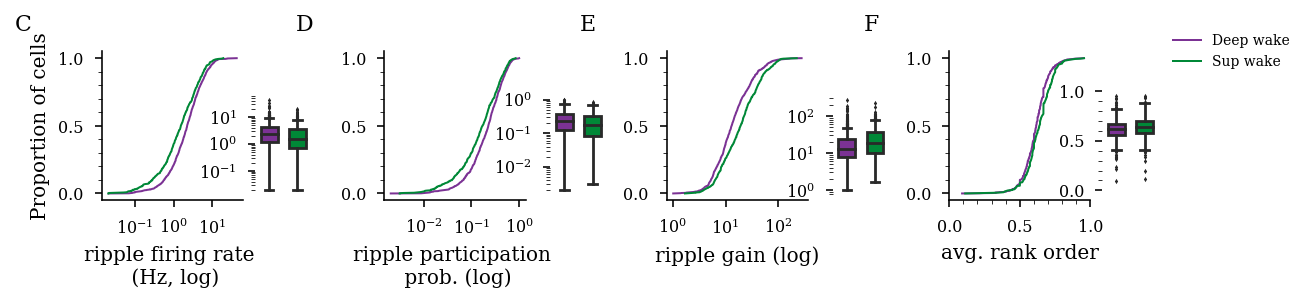

In [328]:
import custom_plots
group_colors = {"deep_rem_shift_WAKEepisode": '#7b3294',
            'sup_non_rem_shift_WAKEepisode': '#008837'}
            
            
fig, axs = plt.subplots(1,4, figsize=functions.set_size('thesis', fraction=1.5, subplots=(1, 4)), edgecolor='k')
fig.subplots_adjust(hspace = .7, wspace=1)
axs = axs.ravel()

plot_ecdf("ripple_FRall",temp_df_2,"_WAKEepisode","deep_rem_shift",axs[0],group_colors)
plot_ecdf("ripple_FRall",temp_df_2,"_WAKEepisode","sup_non_rem_shift",axs[0],group_colors)
plot_ecdf("ripple_FRall",temp_df_2,"_NREMepisode","deep_rem_shift",axs[0],group_colors)
plot_ecdf("ripple_FRall",temp_df_2,"_NREMepisode","sup_non_rem_shift",axs[0],group_colors)
axs[0].set_xscale('log')
axs[0].set_xlabel('ripple firing rate \n (Hz, log)')
axs[0].set_ylabel('Proportion of cells')

plot_ecdf("ripple_particip",temp_df_2,"_WAKEepisode","deep_rem_shift",axs[1],group_colors)
plot_ecdf("ripple_particip",temp_df_2,"_WAKEepisode","sup_non_rem_shift",axs[1],group_colors)
plot_ecdf("ripple_particip",temp_df_2,"_NREMepisode","deep_rem_shift",axs[1],group_colors)
plot_ecdf("ripple_particip",temp_df_2,"_NREMepisode","sup_non_rem_shift",axs[1],group_colors)
axs[1].set_xscale('log')
axs[1].set_xlabel('ripple participation \n prob. (log)')

plot_ecdf("ripple_GainParticip",temp_df_2,"_WAKEepisode","deep_rem_shift",axs[2],group_colors,label="Deep wake")
plot_ecdf("ripple_GainParticip",temp_df_2,"_WAKEepisode","sup_non_rem_shift",axs[2],group_colors,label="Sup wake")
plot_ecdf("ripple_GainParticip",temp_df_2,"_NREMepisode","deep_rem_shift",axs[2],group_colors,label="Deep NREM")
plot_ecdf("ripple_GainParticip",temp_df_2,"_NREMepisode","sup_non_rem_shift",axs[2],group_colors,label="Sup NREM")
axs[2].set_xscale("log") 
axs[2].set_xlabel('ripple gain (log)')

plot_ecdf("rankorder",temp_df_2,"_WAKEepisode","deep_rem_shift",axs[3],group_colors,label="Deep wake")
plot_ecdf("rankorder",temp_df_2,"_WAKEepisode","sup_non_rem_shift",axs[3],group_colors,label="Sup wake")
plot_ecdf("rankorder",temp_df_2,"_NREMepisode","deep_rem_shift",axs[3],group_colors,label="Deep NREM")
plot_ecdf("rankorder",temp_df_2,"_NREMepisode","sup_non_rem_shift",axs[3],group_colors,label="Sup NREM")
axs[3].set_xlabel('avg. rank order')
axs[3].set_xlim(0,1)

for i in range(4):
    right_side = axs[i].spines["right"]
    right_side.set_visible(False)
    top_side = axs[i].spines["top"]
    top_side.set_visible(False)
    axs[i].xaxis.set_minor_locator(AutoMinorLocator())
    axs[i].yaxis.set_minor_locator(AutoMinorLocator())

# plot box plots
ax_ = custom_plots.plot_box(temp_df_2,'state_layer',"ripple_FRall",axs[0],fig,group_colors,x_offset=.12)
ax_.set_yscale("log") 

ax_ = custom_plots.plot_box(temp_df_2,'state_layer',"ripple_particip",axs[1],fig,group_colors,x_offset=.13)
ax_.set_yscale("log") 

ax_ = custom_plots.plot_box(temp_df_2,'state_layer',"ripple_GainParticip",axs[2],fig,group_colors,x_offset=.13)
ax_.set_yscale("log") 

ax_ = custom_plots.plot_box(temp_df_2,'state_layer',"rankorder",axs[3],fig,group_colors,x_offset=.12,y_offset=.05)
ax_.set_ylim(0,1)

# set legend
axs[3].legend(loc='best', bbox_to_anchor=(2, 0., 0.5, 1.2),
                fontsize='x-small',frameon=False)

for i, label in enumerate(('C','D','E','F')):
    axs[i].text(-0.5, 1.25, label, transform=axs[i].transAxes,
        fontsize=11, fontweight='normal', va='top', ha='right')

plt.savefig(os.path.join(fig_save_path,'ripple_features_deep_sup_rem_shift_v2.svg'),dpi=300,bbox_inches='tight')

In [329]:
temp_df_2.to_csv(r'Z:\home\ryanh\projects\ripple_heterogeneity\deep_sup_remshift_state.csv')

# deep/mid/sup

In [455]:
# temp_df = df_states[(df_states.putativeCellType=="Pyramidal Cell") & (df_states.brainRegion.str.contains("CA1"))]
# temp_df['state_layer'] = temp_df.layer_rem_shift.values+temp_df.state.values

# temp_df_2 = temp_df
# temp_df_2 = temp_df_2.replace([np.inf, -np.inf], np.nan)
# temp_df_2 = temp_df_2.dropna()

In [18]:
# deep = -10
# middle = [-10,10]
# sup = 10

dist = 30
deep = -dist
middle = [-dist,dist]
sup = dist

df_states.loc[df_states.deepSuperficialDistance  < deep, "ca1_layer"] = "Deep"
df_states.loc[(df_states.deepSuperficialDistance  > middle[0]) & (df_states.deepSuperficialDistance  < middle[1]), "ca1_layer"] = "Middle"
df_states.loc[df_states.deepSuperficialDistance  > sup, "ca1_layer"] = "Superficial"

## wake

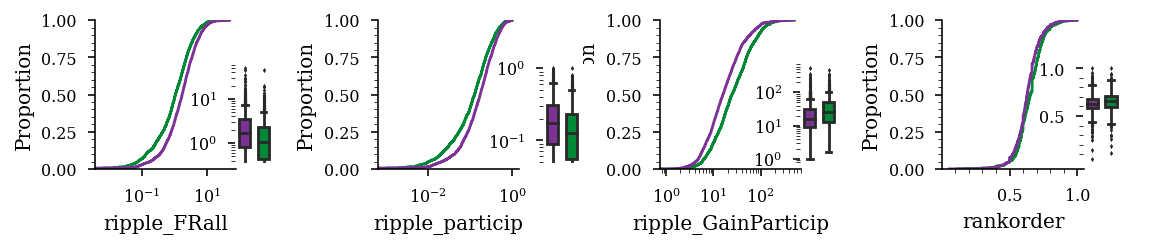

In [20]:
from ripple_heterogeneity.utils import custom_plots
group_colors = {"Deep": '#7b3294',
            'Superficial': '#008837',
            'Middle': 'orange'
            } 
sns.set_palette(sns.color_palette(group_colors.values()))
            
fig, axs = plt.subplots(1,4,
    figsize=functions.set_size("thesis", fraction=1.5, subplots=(1, 4)),
    edgecolor="k",
)
fig.subplots_adjust(hspace=0.7, wspace=1)
axs = axs.ravel()

idx = (df_states.state == "_WAKEepisode") & (df_states.ca1_layer != "Middle") & df_states.putativeCellType.str.contains("Pyr")

ax_ = custom_plots.plot_ecdf_box(df_states[idx],"ripple_FRall","ca1_layer",group_colors.keys(),axs[0],fig,x_offset=0.11)
axs[0].set_xscale('log')
ax_.set_yscale('log')

ax_ = custom_plots.plot_ecdf_box(df_states[idx],"ripple_particip","ca1_layer",group_colors.keys(),axs[1],fig,x_offset=0.13)
axs[1].set_xscale('log')
ax_.set_yscale('log')

ax_ = custom_plots.plot_ecdf_box(df_states[idx],"ripple_GainParticip","ca1_layer",group_colors.keys(),axs[2],fig,x_offset=0.11)
axs[2].set_xscale('log')
ax_.set_yscale('log')

ax_ = custom_plots.plot_ecdf_box(df_states[idx],"rankorder","ca1_layer",group_colors.keys(),axs[3],fig,x_offset=0.11)

# for i, label in enumerate(('C','D','E','F')):
#     axs[i].text(-0.5, 1.25, label, transform=axs[i].transAxes, 
#         fontsize=11, fontweight='normal', va='top', ha='right')

plt.savefig(os.path.join(fig_save_path,'ripple_features_deep_sup_wake.svg'),dpi=300,bbox_inches='tight')


## NREM

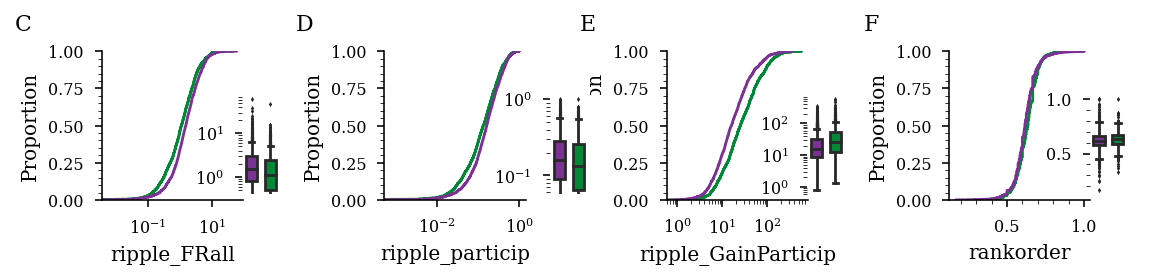

In [27]:
group_colors = {"Deep": '#7b3294',
            'Superficial': '#008837',
            'Middle': 'orange'
            } 
sns.set_palette(sns.color_palette(group_colors.values()))
            
fig, axs = plt.subplots(1,4,
    figsize=functions.set_size("thesis", fraction=1.5, subplots=(1, 4)),
    edgecolor="k",
)
fig.subplots_adjust(hspace=0.7, wspace=1)
axs = axs.ravel()

idx = (df_states.state == "_NREMepisode") & (df_states.ca1_layer != "Middle") & df_states.putativeCellType.str.contains("Pyr")

ax_ = custom_plots.plot_ecdf_box(df_states[idx],"ripple_FRall","ca1_layer",group_colors.keys(),axs[0],fig,x_offset=0.11)
axs[0].set_xscale('log')
ax_.set_yscale('log')

ax_ = custom_plots.plot_ecdf_box(df_states[idx],"ripple_particip","ca1_layer",group_colors.keys(),axs[1],fig,x_offset=0.13)
axs[1].set_xscale('log')
ax_.set_yscale('log')

ax_ = custom_plots.plot_ecdf_box(df_states[idx],"ripple_GainParticip","ca1_layer",group_colors.keys(),axs[2],fig,x_offset=0.11)
axs[2].set_xscale('log')
ax_.set_yscale('log')

ax_ = custom_plots.plot_ecdf_box(df_states[idx],"rankorder","ca1_layer",group_colors.keys(),axs[3],fig,x_offset=0.11)

for i, label in enumerate(('C','D','E','F')):
    axs[i].text(-0.5, 1.25, label, transform=axs[i].transAxes, 
        fontsize=11, fontweight='normal', va='top', ha='right')

## add mazes

In [35]:
for basepath in df_states.basepath.unique():
    epochs_df = loading.load_epoch(basepath)
    mazes = epochs_df[epochs_df.environment != "sleep"].environment.values
    df_states.loc[df_states.basepath == basepath, "mazes"] = "_".join(mazes)

### see if just linear track looks different

In [43]:
idx = (df_states.state == "_WAKEepisode") & (df_states.ca1_layer != "Middle") & df_states.putativeCellType.str.contains("Pyr") & (df_states.mazes == "linear")

df_states[idx].basepath.unique()

array(['Z:\\Data\\AYAold\\AB1\\day1', 'Z:\\Data\\AYAold\\AB3\\AB3_58_59',
       'Z:\\Data\\AYAold\\AYA4\\day150728',
       'Z:\\Data\\AYAold\\AYA6\\day17', 'Z:\\Data\\AYAold\\AYA6\\day19',
       'Z:\\Data\\AYAold\\AYA6\\day20', 'Z:\\Data\\AYAold\\AYA7\\day27',
       'Z:\\Data\\AYAold\\AYA9\\day17',
       'Z:\\Data\\GrosmarkAD\\Achilles\\Achilles_10252013',
       'Z:\\Data\\GrosmarkAD\\Achilles\\Achilles_11012013',
       'Z:\\Data\\GrosmarkAD\\Buddy\\Buddy_06272013',
       'Z:\\Data\\GrosmarkAD\\Cicero\\Cicero_09012014',
       'Z:\\Data\\GrosmarkAD\\Cicero\\Cicero_09102014',
       'Z:\\Data\\GrosmarkAD\\Cicero\\Cicero_09172014',
       'Z:\\Data\\GrosmarkAD\\Gatsby\\Gatsby_08022013',
       'Z:\\Data\\GrosmarkAD\\Gatsby\\Gatsby_08282013',
       'Z:\\Data\\Kenji\\ec014.459_480', 'Z:\\Data\\Kenji\\ec014.628_645',
       'Z:\\Data\\Kenji\\ec016.267_278', 'Z:\\Data\\HMC1\\day8'],
      dtype=object)

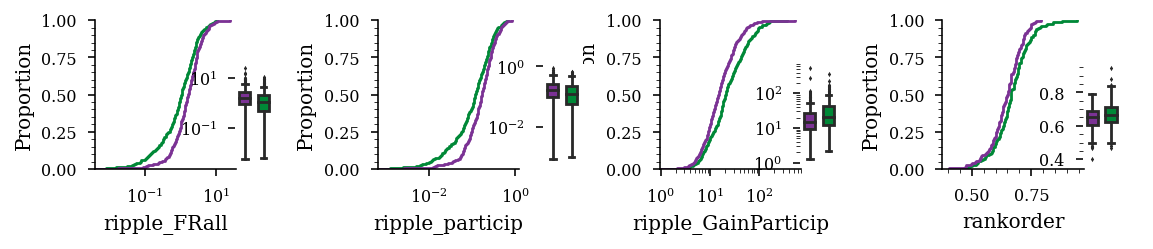

In [41]:
group_colors = {"Deep": '#7b3294',
            'Superficial': '#008837',
            'Middle': 'orange'
            } 
sns.set_palette(sns.color_palette(group_colors.values()))
            
fig, axs = plt.subplots(1,4,
    figsize=functions.set_size("thesis", fraction=1.5, subplots=(1, 4)),
    edgecolor="k",
)
fig.subplots_adjust(hspace=0.7, wspace=1)
axs = axs.ravel()

idx = (df_states.state == "_WAKEepisode") & (df_states.ca1_layer != "Middle") & df_states.putativeCellType.str.contains("Pyr") & (df_states.mazes == "linear")

ax_ = custom_plots.plot_ecdf_box(df_states[idx],"ripple_FRall","ca1_layer",group_colors.keys(),axs[0],fig,x_offset=0.11)
axs[0].set_xscale('log')
ax_.set_yscale('log')

ax_ = custom_plots.plot_ecdf_box(df_states[idx],"ripple_particip","ca1_layer",group_colors.keys(),axs[1],fig,x_offset=0.13)
axs[1].set_xscale('log')
ax_.set_yscale('log')

ax_ = custom_plots.plot_ecdf_box(df_states[idx],"ripple_GainParticip","ca1_layer",group_colors.keys(),axs[2],fig,x_offset=0.11)
axs[2].set_xscale('log')
ax_.set_yscale('log')

ax_ = custom_plots.plot_ecdf_box(df_states[idx],"rankorder","ca1_layer",group_colors.keys(),axs[3],fig,x_offset=0.11)

# for i, label in enumerate(('C','D','E','F')):
#     axs[i].text(-0.5, 1.25, label, transform=axs[i].transAxes, 
#         fontsize=11, fontweight='normal', va='top', ha='right')

In [522]:
df_states.to_csv(r'Z:\home\ryanh\projects\ripple_heterogeneity\df_states.csv')

## upper and lower 20% participation deep/sup

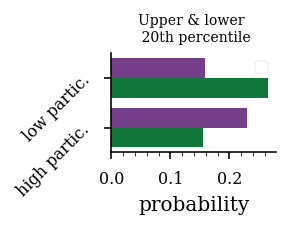

In [30]:
plt.figure(figsize=functions.set_size('thesis', fraction=.25, subplots=(1, 1)), edgecolor='k')

idx = (df_states.state == "_WAKEepisode") & (df_states.ca1_layer != "Middle") & df_states.putativeCellType.str.contains("Pyr")
temp_state_df = df_states[idx]

bad_idx = np.isnan(temp_state_df.ripple_particip)
temp_state_df = temp_state_df[~bad_idx]


hi_thres = np.percentile(temp_state_df.ripple_particip, 80)
low_thres = np.percentile(temp_state_df.ripple_particip, 20)

y1 = [sum((temp_state_df.ca1_layer == 'Deep') & (temp_state_df.ripple_particip <= low_thres)) / sum(temp_state_df.ca1_layer == 'Deep'),
        sum((temp_state_df.ca1_layer == 'Superficial') & (temp_state_df.ripple_particip <= low_thres)) / sum(temp_state_df.ca1_layer == 'Superficial')]

y2 = [sum((temp_state_df.ca1_layer == 'Deep') & (temp_state_df.ripple_particip >= hi_thres)) / sum(temp_state_df.ca1_layer == 'Deep'),
        sum((temp_state_df.ca1_layer == 'Superficial') & (temp_state_df.ripple_particip >= hi_thres)) / sum(temp_state_df.ca1_layer == 'Superficial')]

df2 = pd.DataFrame([y1[0],y1[1],y2[0],y2[1]],
                        columns=['probability'])

df2["label"] = ["deep_low","sup_low","deep_high","sup_high"]
df2["participation_cat"] = ["low partic.","low partic.","high partic.","high partic."]
df2["layer"] = ["deep","sup","deep","sup"]

group_colors = {"deep": '#7b3294',
                'sup': '#008837'} 
sns.set_palette(sns.color_palette(group_colors.values()))
ax = plt.gca()
sns.barplot(x="probability",y="participation_cat",hue="layer", data=df2,ax=ax)
ax.set_ylabel('')
ax.legend('')
ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.set_yticklabels(ax.get_yticklabels(),rotation = 45)
ax.set_title("Upper & lower \n 20th percentile",fontsize=7)
plt.savefig(os.path.join(fig_save_path,'deep_sup_particip_prop.svg'),dpi=300,bbox_inches='tight')


In [ ]:
plt.figure(figsize=functions.set_size('thesis', fraction=.25, subplots=(1, 1)), edgecolor='k')

hi_thres = np.percentile(temp_df_2.ripple_particip, 80)
low_thres = np.percentile(temp_df_2.ripple_particip, 20)

y1 = [sum((temp_df_2.state_layer == 'deep_rem_shift_WAKEepisode') & (temp_df_2.ripple_particip <= low_thres)) / sum(temp_df_2.state_layer == 'deep_rem_shift_WAKEepisode'),
        sum((temp_df_2.state_layer == 'sup_non_rem_shift_WAKEepisode') & (temp_df_2.ripple_particip <= low_thres)) / sum(temp_df_2.state_layer == 'sup_non_rem_shift_WAKEepisode')]

y2 = [sum((temp_df_2.state_layer == 'deep_rem_shift_WAKEepisode') & (temp_df_2.ripple_particip >= hi_thres)) / sum(temp_df_2.state_layer == 'deep_rem_shift_WAKEepisode'),
        sum((temp_df_2.state_layer == 'sup_non_rem_shift_WAKEepisode') & (temp_df_2.ripple_particip >= hi_thres)) / sum(temp_df_2.state_layer == 'sup_non_rem_shift_WAKEepisode')]

df2 = pd.DataFrame([y1[0],y1[1],y2[0],y2[1]],
                   columns=['probability'])
                   
df2["label"] = ["deep_low","sup_low","deep_high","sup_high"]
df2["participation_cat"] = ["low partic.","low partic.","high partic.","high partic."]
df2["layer_rem_shift"] = ["deep rem shift","sup non rem shift","deep rem shift","sup non rem shift"]

group_colors = {"deep rem shift": '#7b3294',
            'sup non rem shift': '#008837'} 
sns.set_palette(sns.color_palette(group_colors.values()))
ax = plt.gca()
sns.barplot(x="probability",y="participation_cat",hue="layer_rem_shift", data=df2,ax=ax)
ax.set_ylabel('')
ax.legend('')
ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.set_yticklabels(ax.get_yticklabels(),rotation = 45)

plt.savefig(os.path.join(fig_save_path,'deep_sup_rem_shift_particip_prop.svg'),dpi=300,bbox_inches='tight')

In [337]:
# df_ratios = pd.read_csv(r'Z:\home\ryanh\projects\ripple_heterogeneity\ripple_participation_stability_pre_task_post.csv')

# particip_prob_ratio = []
# fr_ratio = []
# source = []
# for temp_df in df_unit.itertuples():

#     idx = (df_ratios.basepath == temp_df.basepath) & (df_ratios.UID == temp_df.UID)
#     if sum(idx)>1:
#         particip_prob_ratio.append(np.nanmean(df_ratios[idx].particip_prob_ratio.values))
#         fr_ratio.append(np.nanmean(df_ratios[idx].fr_ratio.values))
#         source.append('incorrect_idx')
#     elif sum(idx) == 1:
#         particip_prob_ratio.append(df_ratios[idx].particip_prob_ratio.values)
#         fr_ratio.append(df_ratios[idx].fr_ratio.values)
#         source.append('correct_idx')
#     else:
#         particip_prob_ratio.append(np.nan)
#         fr_ratio.append(np.nan)
#         source.append('missing')
        
# df_unit['particip_prob_ratio'] = np.hstack(particip_prob_ratio)
# df_unit['fr_ratio'] = np.hstack(fr_ratio)
# df_unit['ratio_source'] = np.hstack(source)

# sns.scatterplot(x="sig_pc_prop", y="particip_prob_ratio",
#                 hue="ratio_source",
#                 palette="ch:r=-.2,d=.3_r",
#                 sizes=(1, 8), linewidth=0,
#                 data=df_unit)
# # df_unit

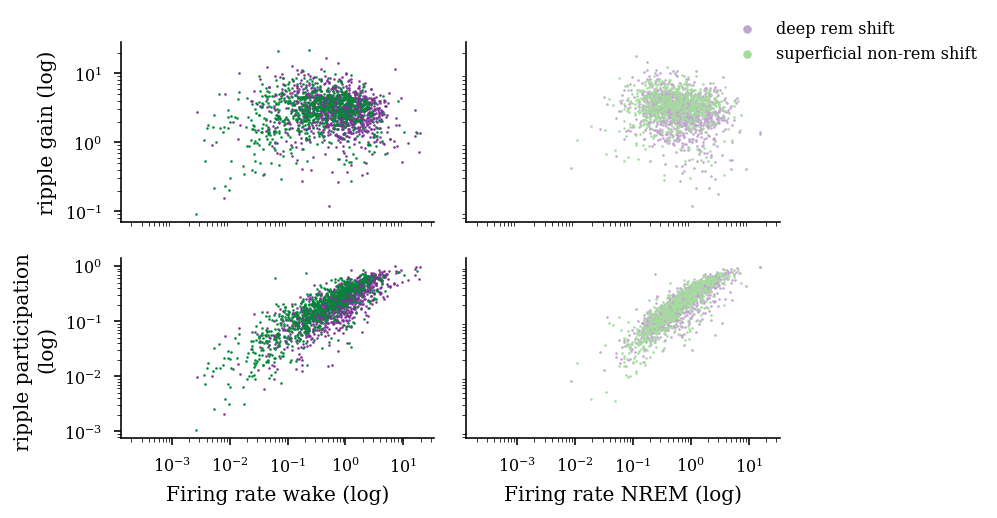

In [338]:
group_colors = {"deep_rem_shift_WAKEepisode": '#7b3294',
            "deep_rem_shift_NREMepisode": '#c2a5cf',
            'sup_non_rem_shift_WAKEepisode': '#008837',
            'sup_non_rem_shift_NREMepisode': '#a6dba0'} 
fig, axs = plt.subplots(2,2, figsize=functions.set_size('thesis', fraction=1, subplots=(2, 2)), edgecolor='k')
fig.subplots_adjust(hspace = 0.2, wspace=.1)
axs = axs.ravel()

axs[0].scatter(temp_df[temp_df.state_layer=="deep_rem_shift_WAKEepisode"].firingRate,
                temp_df[temp_df.state_layer=="deep_rem_shift_WAKEepisode"].ripple_GainAll,
                color=group_colors['deep_rem_shift_WAKEepisode'],s=1)

axs[0].scatter(temp_df[temp_df.state_layer=="sup_non_rem_shift_WAKEepisode"].firingRate,
                temp_df[temp_df.state_layer=="sup_non_rem_shift_WAKEepisode"].ripple_GainAll,
                color=group_colors['sup_non_rem_shift_WAKEepisode'],s=1)

axs[0].set_xscale('log')                
axs[0].set_yscale('log')   
axs[0].set_xlabel('')
axs[0].set_ylabel('ripple gain (log)')


axs[1].scatter(temp_df[temp_df.state_layer=="deep_rem_shift_NREMepisode"].firingRate,
                temp_df[temp_df.state_layer=="deep_rem_shift_NREMepisode"].ripple_GainAll,
                color=group_colors['deep_rem_shift_NREMepisode'],s=1,label="deep rem shift")

axs[1].scatter(temp_df[temp_df.state_layer=="sup_non_rem_shift_NREMepisode"].firingRate,
                temp_df[temp_df.state_layer=="sup_non_rem_shift_NREMepisode"].ripple_GainAll,
                color=group_colors['sup_non_rem_shift_NREMepisode'],s=1,label="superficial non-rem shift")

axs[1].set_xscale('log')                
axs[1].set_yscale('log')   
axs[1].set_xlabel('')
axs[1].set_ylabel('')
axs[1].legend(loc='best', bbox_to_anchor=(.8, 0., 0.5, 1.2),frameon=False,markerscale=4)


axs[2].scatter(temp_df[temp_df.state_layer=="deep_rem_shift_WAKEepisode"].firingRate,
                temp_df[temp_df.state_layer=="deep_rem_shift_WAKEepisode"].ripple_particip,
                color=group_colors['deep_rem_shift_WAKEepisode'],s=1)

axs[2].scatter(temp_df[temp_df.state_layer=="sup_non_rem_shift_WAKEepisode"].firingRate,
                temp_df[temp_df.state_layer=="sup_non_rem_shift_WAKEepisode"].ripple_particip,
                color=group_colors['sup_non_rem_shift_WAKEepisode'],s=1)

axs[2].set_xscale('log')                
axs[2].set_yscale('log')   
axs[2].set_xlabel('Firing rate wake (log)')
axs[2].set_ylabel('ripple participation \n(log)')


axs[3].scatter(temp_df[temp_df.state_layer=="deep_rem_shift_NREMepisode"].firingRate,
                temp_df[temp_df.state_layer=="deep_rem_shift_NREMepisode"].ripple_particip,
                color=group_colors['deep_rem_shift_NREMepisode'],s=1)

axs[3].scatter(temp_df[temp_df.state_layer=="sup_non_rem_shift_NREMepisode"].firingRate,
                temp_df[temp_df.state_layer=="sup_non_rem_shift_NREMepisode"].ripple_particip,
                color=group_colors['sup_non_rem_shift_NREMepisode'],s=1)

axs[3].set_xscale('log')                
axs[3].set_yscale('log')   
axs[3].set_xlabel('Firing rate NREM (log)')
axs[3].set_ylabel('')

axs[0].axes.get_xaxis().set_ticks([])
axs[1].axes.get_xaxis().set_ticks([])

axs[1].axes.get_yaxis().set_ticks([])
axs[3].axes.get_yaxis().set_ticks([])

set_equal_axis_range(axs[0],axs[1])
set_equal_axis_range(axs[2],axs[3])

for i in range(4):
    right_side = axs[i].spines["right"]
    right_side.set_visible(False)
    top_side = axs[i].spines["top"]
    top_side.set_visible(False)

plt.savefig(os.path.join(fig_save_path,'fr_ripple_par_gain_log_rem_shift.pdf'),dpi=300,bbox_inches='tight')


# 25% or so of cells with higher and lower ripple participation and look if they have different properties.


C:\Users\Cornell\AppData\Local\Temp/ipykernel_25004/1448957227.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


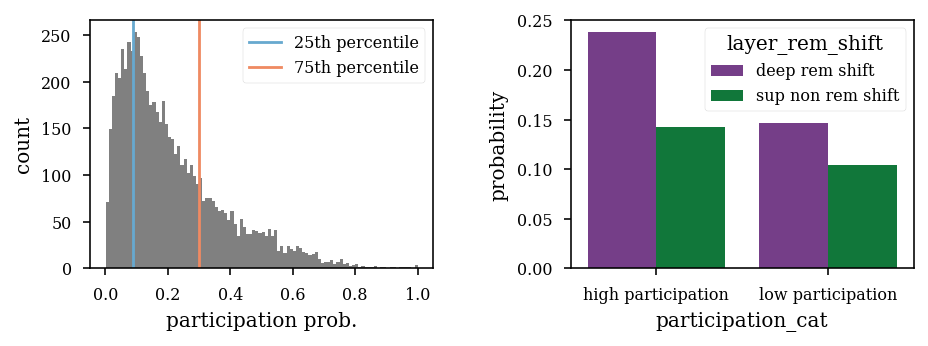

In [339]:
temp_df = df[(df.putativeCellType=="Pyramidal Cell") & (df.brainRegion.str.contains("CA1"))]
hi_thres = np.percentile(x, 75)
low_thres = np.percentile(x, 25)

temp_df.participation_cat = 'unidentified'
temp_df.loc[(temp_df.ripple_particip.values >= hi_thres), "participation_cat"] = 'high_particip'
temp_df.loc[(temp_df.ripple_particip.values <= low_thres), "participation_cat"] = 'low_particip'


fig, axs = plt.subplots(1,2, figsize=functions.set_size('thesis', fraction=1.25, subplots=(1, 2)), edgecolor='k')
fig.subplots_adjust(hspace = 0.2, wspace=.4)
axs = axs.ravel()


axs[0].hist(temp_df.ripple_particip,100,color='grey')
x = temp_df.ripple_particip[~np.isnan(temp_df.ripple_particip)]
axs[0].axvline(np.percentile(x, 25),color="#67a9cf",label='25th percentile')
axs[0].axvline(np.percentile(x, 75),color="#ef8a62",label='75th percentile')

axs[0].set_xlabel('participation prob.')
axs[0].set_ylabel('count')

axs[0].legend()


prop_deep_high = ((((temp_df.layer_rem_shift == "deep_rem_shift") & (temp_df["participation_cat"] == "high_particip"))*1).sum() /
                             (((temp_df["participation_cat"] == "high_particip"))*1).sum())
prop_sup_high = ((((temp_df.layer_rem_shift == "sup_non_rem_shift") & (temp_df["participation_cat"] == "high_particip"))*1).sum() /
                             (((temp_df["participation_cat"] == "high_particip"))*1).sum())
prop_deep_low = ((((temp_df.layer_rem_shift == "deep_rem_shift") & (temp_df["participation_cat"] == "low_particip"))*1).sum() /
                             (((temp_df["participation_cat"] == "low_particip"))*1).sum())
prop_sup_low = ((((temp_df.layer_rem_shift == "sup_non_rem_shift") & (temp_df["participation_cat"] == "low_particip"))*1).sum() /
                             (((temp_df["participation_cat"] == "low_particip"))*1).sum())
df2 = pd.DataFrame([prop_deep_high,prop_sup_high,prop_deep_low,prop_sup_low],
                   columns=['probability'])
df2["label"] = ["deep_high","sup_high","deep_low","sup_low"]
df2["participation_cat"] = ["high participation","high participation","low participation","low participation"]
df2["layer_rem_shift"] = ["deep rem shift","sup non rem shift","deep rem shift","sup non rem shift"]

group_colors = {"deep rem shift": '#7b3294',
            'sup non rem shift': '#008837'} 
sns.set_palette(sns.color_palette(group_colors.values()))


sns.barplot(x="participation_cat", y="probability",hue="layer_rem_shift", data=df2,ax=axs[1])


plt.savefig(os.path.join(fig_save_path,'hi_low_participation.pdf'),dpi=300,bbox_inches='tight')

# np.percentile(x, 50)

C:\Users\Cornell\anaconda3\envs\ripple_diversity\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.


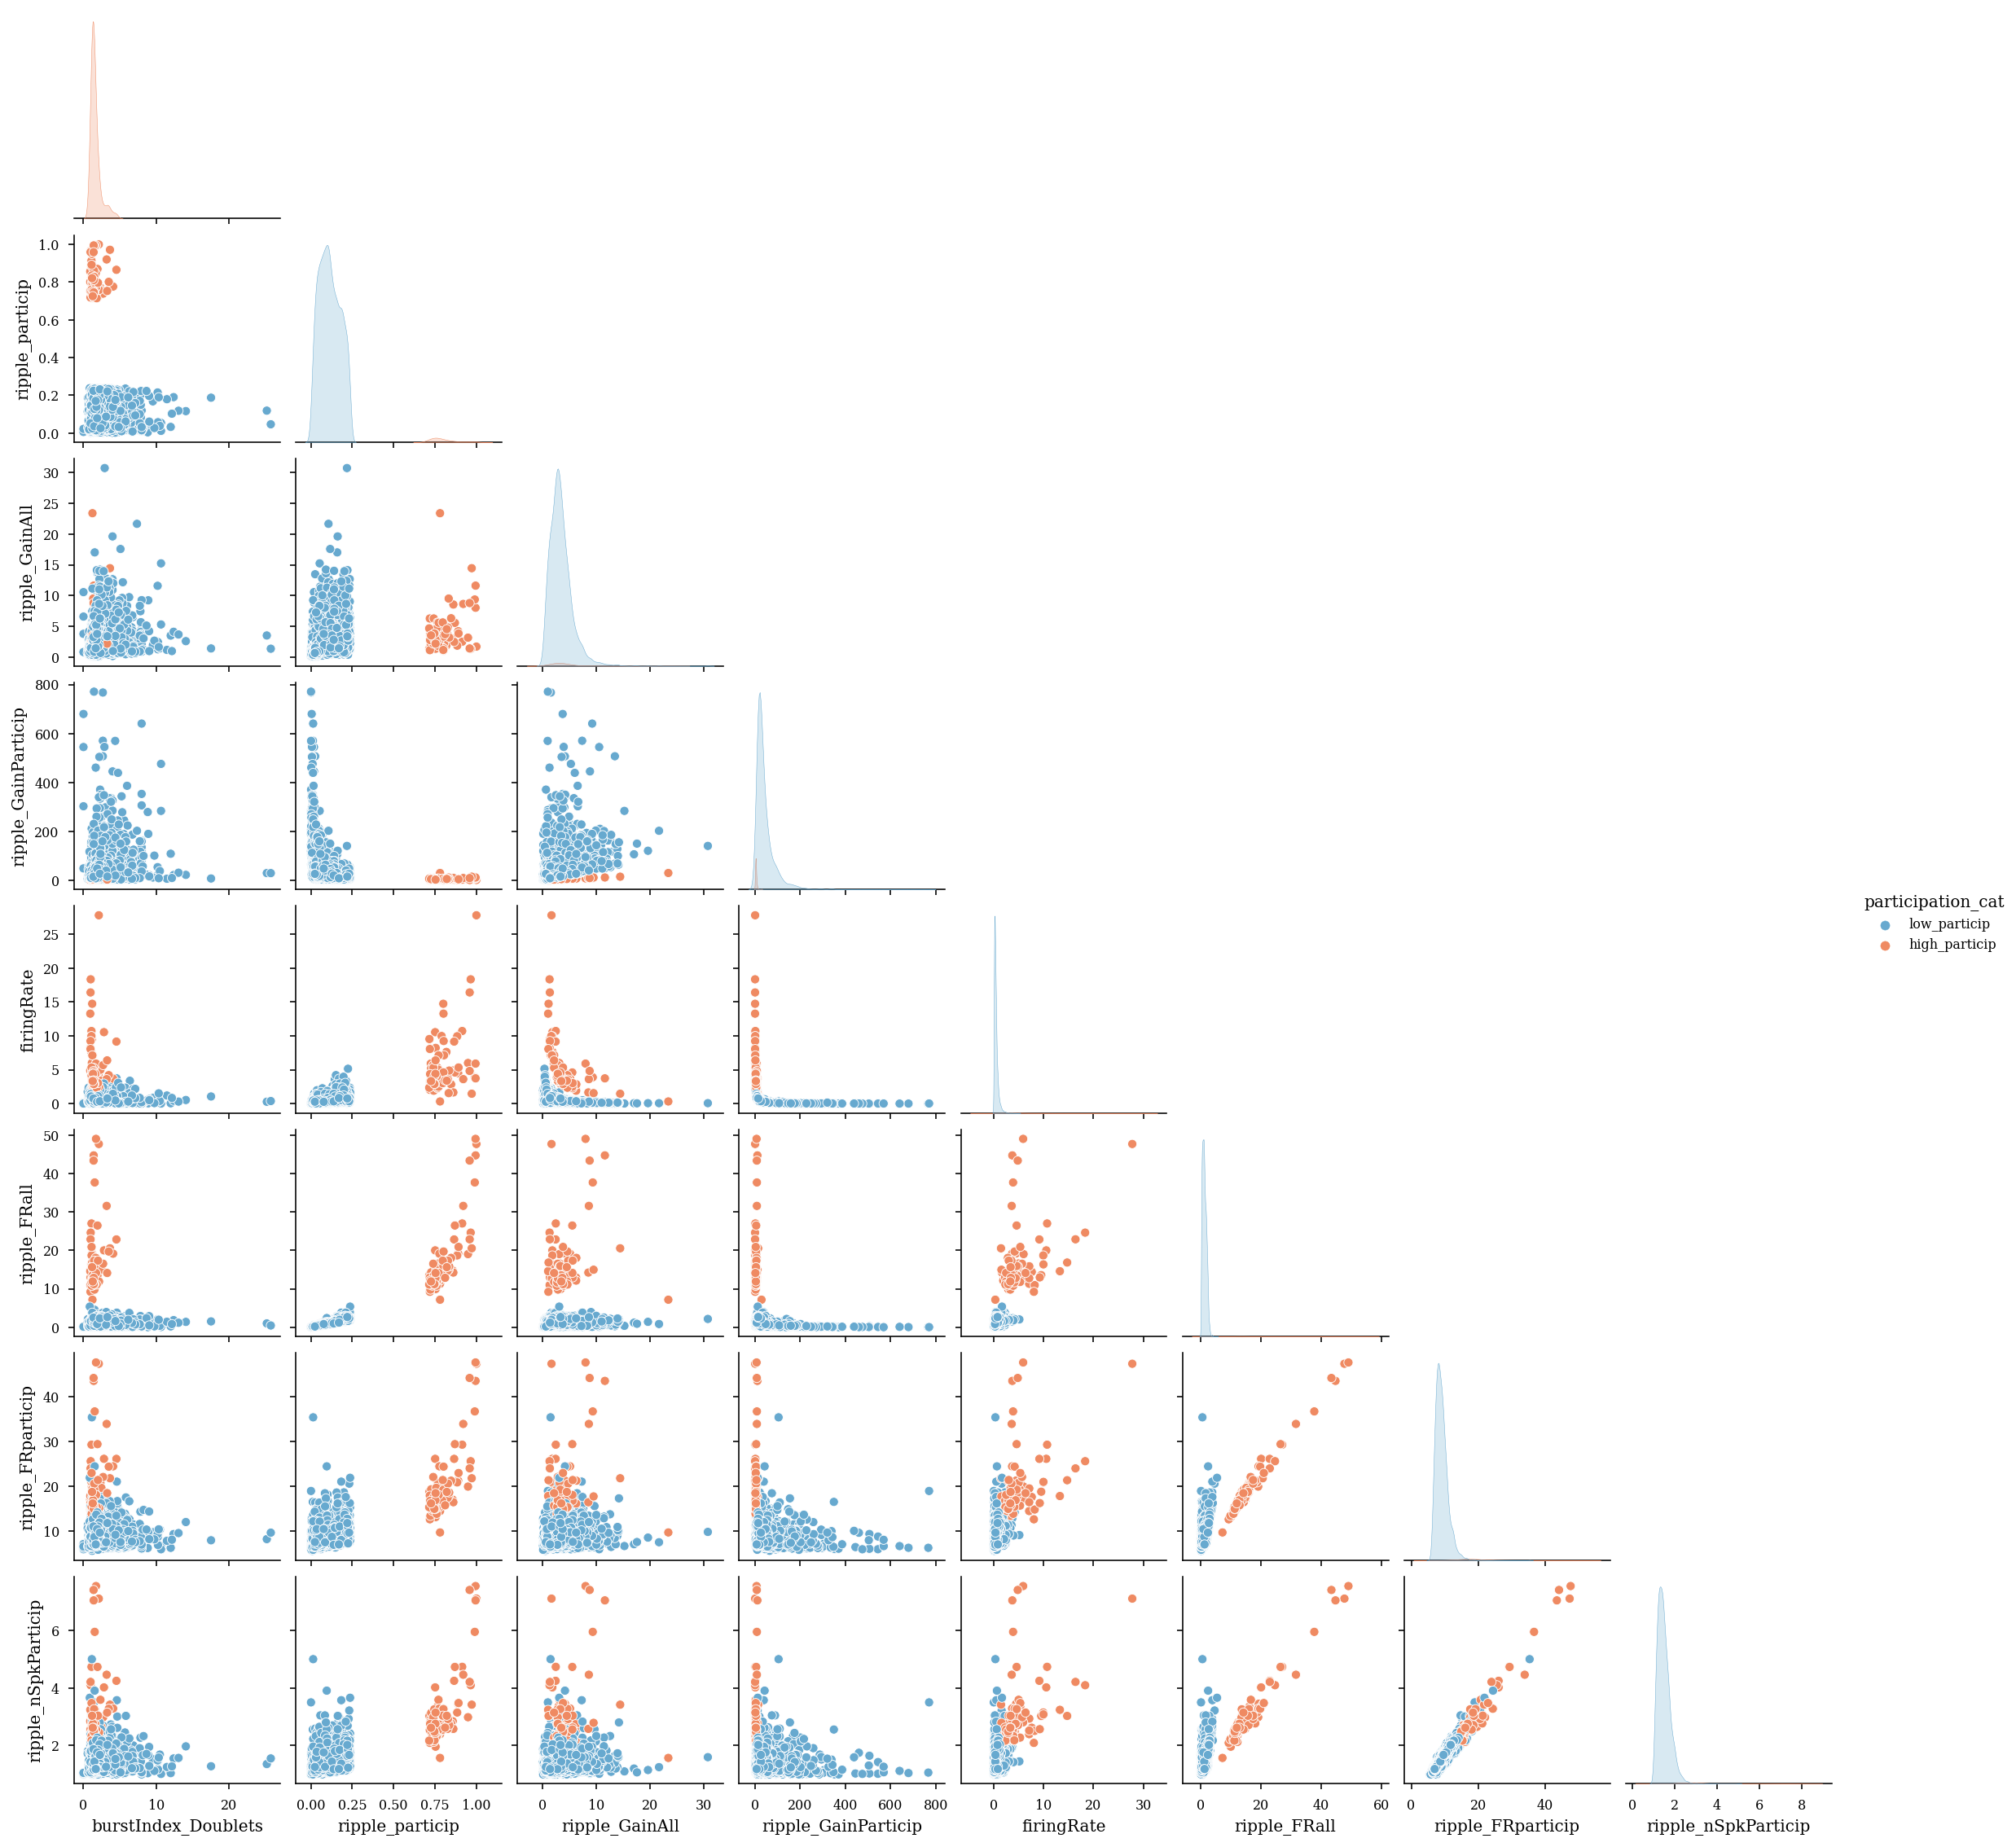

In [340]:
# fig = plt.figure(figsize=functions.set_size('thesis', fraction=1, subplots=(1, 1)), edgecolor='k')

# ax_list = fig.axes

sns.set_palette(sns.color_palette(["#67a9cf","#ef8a62"]))

vars=["burstIndex_Doublets","ripple_particip","ripple_GainAll","ripple_GainParticip","firingRate","ripple_FRall","ripple_FRparticip","ripple_nSpkParticip"]

sns.pairplot(temp_df,
            hue="participation_cat",
            corner=True,
            vars=vars,
            height=2,
            dropna=True)

plt.savefig(os.path.join(fig_save_path,'hi_low_participation_compairsons.pdf'),dpi=300,bbox_inches='tight')
plt.savefig(os.path.join(fig_save_path,'hi_low_participation_compairsons.png'),dpi=300,bbox_inches='tight')


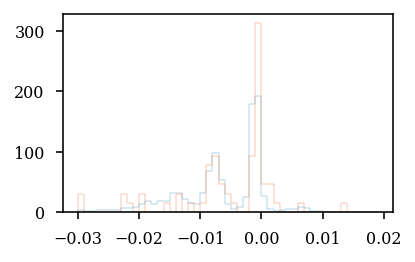

In [341]:
plt.figure(figsize=functions.set_size('thesis', fraction=.5, subplots=(1, 1)), edgecolor='k')

bins = np.arange(-.03,0.02,0.001)
plt.hist(temp_df[temp_df["participation_cat"]=="low_particip"].ripples_modulationPeakResponseTime,bins=bins,density=True,histtype="step")
plt.hist(temp_df[temp_df["participation_cat"]=="high_particip"].ripples_modulationPeakResponseTime,bins=bins,density=True,histtype="step")
plt.show()

In [342]:
from sklearn.manifold import TSNE
from sklearn import preprocessing

vars=["burstIndex_Doublets","ripple_GainAll","ripple_GainParticip","firingRate","ripple_FRall","ripple_FRparticip","ripple_nSpkParticip"]

X = np.array(temp_df.loc[:,vars])

idx = (np.isinf(X).any(axis=1)) | (np.isnan(X).any(axis=1)) 

standardized_X = preprocessing.scale(X[~idx,:])

X_embedded = TSNE(n_components=2,perplexity=50).fit_transform(standardized_X)

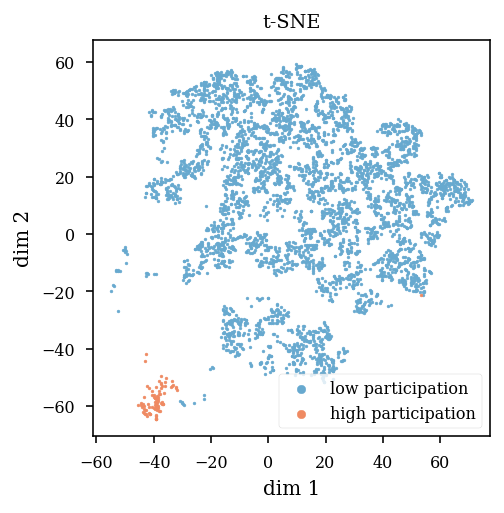

In [343]:
plt.figure(figsize=functions.set_size('thesis', fraction=1, subplots=(1, 1)), edgecolor='k')

plt.scatter(X_embedded[temp_df["participation_cat"][~idx] == "low_particip",0],X_embedded[temp_df["participation_cat"][~idx] == "low_particip",1],s=2,label='low participation')
plt.scatter(X_embedded[temp_df["participation_cat"][~idx] == "high_particip",0],X_embedded[temp_df["participation_cat"][~idx] == "high_particip",1],s=2,label='high participation')
plt.legend(markerscale=3)
plt.axis('square')
plt.title('t-SNE')
plt.xlabel('dim 1')
plt.ylabel('dim 2')

plt.savefig(os.path.join(fig_save_path,'hi_low_participation_tsne.pdf'),dpi=300,bbox_inches='tight')


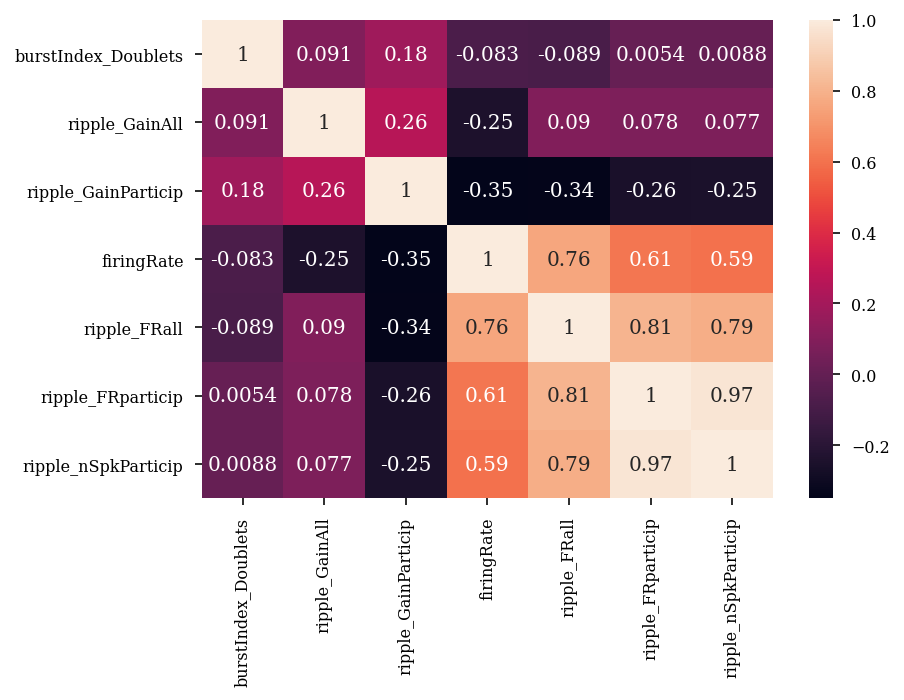

In [344]:
corrMatrix = temp_df[vars].corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

# inspect rank order as a function of deep and superficial

In [345]:
temp_df = df_states[(df_states.putativeCellType=="Pyramidal Cell") & (df_states.brainRegion.str.contains("CA1"))]
temp_df['state_layer'] = temp_df.layer_rem_shift+temp_df.state

temp_df_2 = temp_df.copy()
temp_df_2 = temp_df_2.replace([np.inf, -np.inf], np.nan)

idx = (
    (temp_df_2.state_layer == "deep_rem_shift_NREMepisode") |
    (temp_df_2.state_layer == "sup_non_rem_shift_NREMepisode") |
    (temp_df_2.state_layer == "deep_rem_shift_WAKEepisode") |
    (temp_df_2.state_layer == "sup_non_rem_shift_WAKEepisode") 
)
temp_df_2 = temp_df_2[idx]

group_colors = {"deep_rem_shift_WAKEepisode": '#7b3294',
            "deep_rem_shift_NREMepisode": '#c2a5cf',
            'sup_non_rem_shift_WAKEepisode': '#008837',
            'sup_non_rem_shift_NREMepisode': '#a6dba0'} 

C:\Users\Cornell\AppData\Local\Temp/ipykernel_25004/2818310774.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


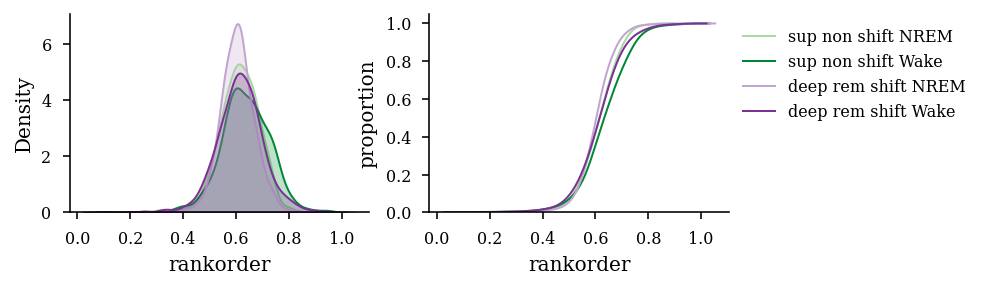

In [346]:
fig, axs = plt.subplots(1,2, figsize=functions.set_size('thesis', fraction=1, subplots=(1, 2)), edgecolor='k')
fig.subplots_adjust(hspace = 0.5, wspace=.2)
axs = axs.ravel()

sns.set_palette(sns.color_palette(group_colors.values()))

plot_hist(temp_df_2,"rankorder",group_colors,axs[0],cumulative=False)
plot_hist(temp_df_2,"rankorder",group_colors,axs[1],cumulative=True)

axs[1].set_ylabel("proportion")

for i in range(2):
    right_side = axs[i].spines["right"]
    right_side.set_visible(False)
    top_side = axs[i].spines["top"]
    top_side.set_visible(False)

axs[1].legend(labels=["sup non shift NREM","sup non shift Wake","deep rem shift NREM","deep rem shift Wake"],
            loc='best',
            bbox_to_anchor=(1, 0., 0.5, 1),
            frameon=False,markerscale=2)

plt.savefig(os.path.join(fig_save_path,'rank_order.pdf'),dpi=300,bbox_inches='tight')

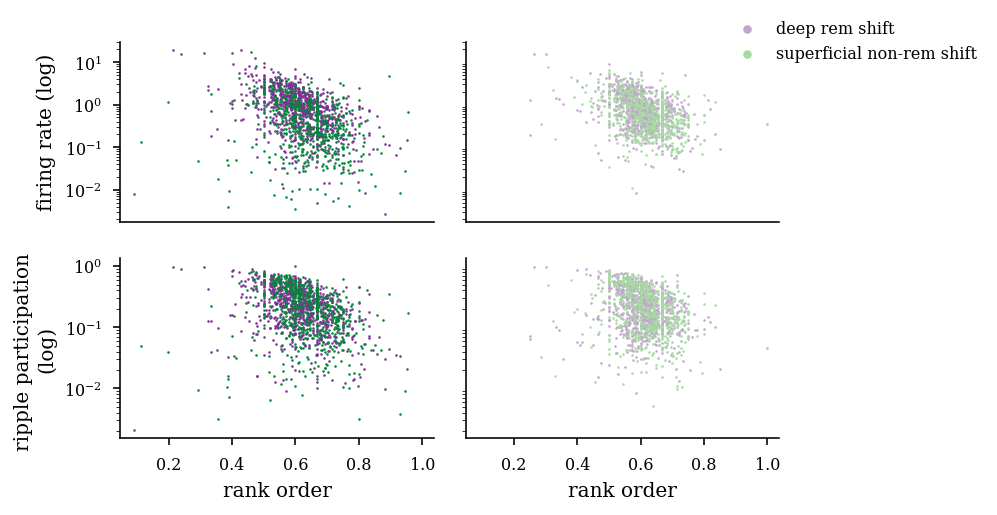

In [347]:
fig, axs = plt.subplots(2,2, figsize=functions.set_size('thesis', fraction=1, subplots=(2, 2)), edgecolor='k')
fig.subplots_adjust(hspace = 0.2, wspace=.1)
axs = axs.ravel()

axs[0].scatter(temp_df[temp_df.state_layer=="deep_rem_shift_WAKEepisode"].rankorder,
                temp_df[temp_df.state_layer=="deep_rem_shift_WAKEepisode"].firingRate,
                color=group_colors['deep_rem_shift_WAKEepisode'],s=1)

axs[0].scatter(temp_df[temp_df.state_layer=="sup_non_rem_shift_WAKEepisode"].rankorder,
                temp_df[temp_df.state_layer=="sup_non_rem_shift_WAKEepisode"].firingRate,
                color=group_colors['sup_non_rem_shift_WAKEepisode'],s=1)

axs[0].set_yscale('log')   
axs[0].set_xlabel('')
axs[0].set_ylabel('firing rate (log)')


axs[1].scatter(temp_df[temp_df.state_layer=="deep_rem_shift_NREMepisode"].rankorder,
                temp_df[temp_df.state_layer=="deep_rem_shift_NREMepisode"].firingRate,
                color=group_colors['deep_rem_shift_NREMepisode'],s=1,label="deep rem shift")

axs[1].scatter(temp_df[temp_df.state_layer=="sup_non_rem_shift_NREMepisode"].rankorder,
                temp_df[temp_df.state_layer=="sup_non_rem_shift_NREMepisode"].firingRate,
                color=group_colors['sup_non_rem_shift_NREMepisode'],s=1,label="superficial non-rem shift")

axs[1].set_yscale('log')   
axs[1].set_xlabel('')
axs[1].set_ylabel('')
axs[1].legend(loc='best', bbox_to_anchor=(.8, 0., 0.5, 1.2),frameon=False,markerscale=4)


axs[2].scatter(temp_df[temp_df.state_layer=="deep_rem_shift_WAKEepisode"].rankorder,
                temp_df[temp_df.state_layer=="deep_rem_shift_WAKEepisode"].ripple_particip,
                color=group_colors['deep_rem_shift_WAKEepisode'],s=1)

axs[2].scatter(temp_df[temp_df.state_layer=="sup_non_rem_shift_WAKEepisode"].rankorder,
                temp_df[temp_df.state_layer=="sup_non_rem_shift_WAKEepisode"].ripple_particip,
                color=group_colors['sup_non_rem_shift_WAKEepisode'],s=1)

axs[2].set_yscale('log')   
axs[2].set_xlabel('rank order')
axs[2].set_ylabel('ripple participation \n(log)')


axs[3].scatter(temp_df[temp_df.state_layer=="deep_rem_shift_NREMepisode"].rankorder,
                temp_df[temp_df.state_layer=="deep_rem_shift_NREMepisode"].ripple_particip,
                color=group_colors['deep_rem_shift_NREMepisode'],s=1)

axs[3].scatter(temp_df[temp_df.state_layer=="sup_non_rem_shift_NREMepisode"].rankorder,
                temp_df[temp_df.state_layer=="sup_non_rem_shift_NREMepisode"].ripple_particip,
                color=group_colors['sup_non_rem_shift_NREMepisode'],s=1)

axs[3].set_yscale('log')   
axs[3].set_xlabel('rank order')
axs[3].set_ylabel('')

axs[0].axes.get_xaxis().set_ticks([])
axs[1].axes.get_xaxis().set_ticks([])

axs[1].axes.get_yaxis().set_ticks([])
axs[3].axes.get_yaxis().set_ticks([])

set_equal_axis_range(axs[0],axs[1])
set_equal_axis_range(axs[2],axs[3])

for i in range(4):
    right_side = axs[i].spines["right"]
    right_side.set_visible(False)
    top_side = axs[i].spines["top"]
    top_side.set_visible(False)

plt.savefig(os.path.join(fig_save_path,'fr_rate_par_rank_rem_shift.pdf'),dpi=300,bbox_inches='tight')